In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
import random
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno


## Overview of the data
**Total records:** 5777\
**Total features including Target:** 31

In [79]:
# read the data
df = pd.read_csv('./data/data.csv', sep=";")
df.shape

(5777, 31)

In [80]:
pd.value_counts(df.dtypes)

float64    15
int64      13
object      3
dtype: int64


Some features have **low STD**, e.g., ***AmbTempDist_K3***, ***AmbTempDist_K4***. We will look into the variance of variables for further investigation. ***PSEUDO_VIN*** has 5777 unique values, so it might not be a useful feature for modeling. 

In [81]:
df.describe()

PSEUDO_VIN        TONDUR  EngSpDist_K1  EngSpDist_K2  EngSpDist_K3  \
count  5777.000000  5.777000e+03  5.777000e+03  5.777000e+03  5.777000e+03   
mean   2889.000000  1.638604e+06  6.949810e+05  5.659570e+05  1.523329e+05   
std    1667.820584  1.478634e+06  7.280069e+05  5.510523e+05  1.698033e+05   
min       1.000000  1.692310e+04  4.641300e+03  4.066000e+02  3.030000e+01   
25%    1445.000000  6.443811e+05  2.352837e+05  1.947698e+05  4.601980e+04   
50%    2889.000000  1.167932e+06  4.634370e+05  3.886051e+05  9.958480e+04   
75%    4333.000000  2.111713e+06  8.623770e+05  7.292884e+05  1.953351e+05   
max    5777.000000  1.151146e+07  6.959281e+06  4.262310e+06  2.453757e+06   

        EngSpDist_K4   EngSpDist_K5  EngSpDist_K6  EngSpDist_K7  EngSpDist_K8  \
count    5777.000000    5777.000000   5777.000000   5777.000000   5777.000000   
mean    17916.948520    2744.953176    769.363095    343.032404    181.538982   
std     31982.030334    6069.909116   1871.395346    803.763476    481.114263   
min        10.400000       3.400000      0.900000      0.200000      0.000000   
25%      3302.400000     609.400000     88.600000     33.900000     15.400000   
50%      8232.300000    1166.800000    261.900000    103.900000     47.700000   
75%     19650.900000    2629.400000    753.300000    319.200000    153.100000   
max    646982.900000  152502.200000  74583.600000  25328.500000  16623.100000   

       ...  AmbTempDist_K3  AmbTempDist_K4  AmbTempDist_K5  AmbTempDist_K6  \
count  ...     5777.000000     5777.000000     5777.000000     5777.000000   
mean   ...        0.041544        1.030812       11.718885      107.391726   
std    ...        0.766331        8.675519       43.497786      182.867761   
min    ...        0.000000        0.000000        0.000000        0.000000   
25%    ...        0.000000        0.000000        0.000000       10.000000   
50%    ...        0.000000        0.000000        0.000000       36.000000   
75%    ...        0.000000        0.000000        4.000000      128.000000   
max    ...       41.000000      395.000000     1016.000000     2592.000000   

       AmbTempDist_K7  AmbTempDist_K8  AmbTempDist_K9  AmbTempDist_K10  \
count     5777.000000     5777.000000     5777.000000      5777.000000   
mean       331.057989      507.202527      194.065605        12.809070   
std        330.765296      447.363231      282.863019        40.439852   
min          0.000000        0.000000        0.000000         0.000000   
25%        113.000000      206.000000       19.000000         0.000000   
50%        226.000000      376.000000       87.000000         0.000000   
75%        433.000000      652.000000      250.000000         4.000000   
max       3874.000000     5947.000000     2579.000000       685.000000   

             MILEAGE  TACHOMETER_IN_KM  
count    5777.000000        336.000000  
mean    13322.323524      30366.226190  
std     13254.917856      17811.425833  
min      1002.000000       1873.000000  
25%      4485.000000      17586.250000  
50%      9330.000000      26821.000000  
75%     17187.000000      40978.000000  
max    157940.000000     115314.000000  

[8 rows x 28 columns]

There are three non-numeric features in the variable including target variable.

In [82]:
df.select_dtypes(exclude="number").head()

DIAGNOSIS_DATE REPAIR_DATE      LABEL
0       03.06.14         NaN  NO_DAMAGE
1       10.08.15         NaN  NO_DAMAGE
2       30.01.15         NaN  NO_DAMAGE
3       02.04.15         NaN  NO_DAMAGE
4       23.11.15         NaN  NO_DAMAGE

Highly imbalanced dataset, ~6% records are available for ***DAMAGE*** class, sampling techniques are required for this problem.

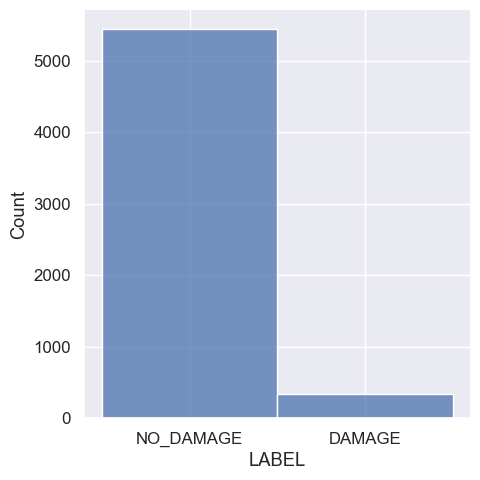

In [122]:
sns.displot(data=df, x="LABEL")

In [130]:
damage=df[df["LABEL"]=='DAMAGE']  
no_damage=df[df["LABEL"]=='NO_DAMAGE'] 
print(f"Only {round(damage.shape[0]/len(df)*100,2)}% of damage records are avaible.")


Only 5.82% of damage records are avaible.


***REPAIR_DATE*** and ***TACHOMETER_IN_KM*** has too many missing values.

In [131]:
df.isna().sum()

PSEUDO_VIN             0
TONDUR                 0
EngSpDist_K1           0
EngSpDist_K2           0
EngSpDist_K3           0
EngSpDist_K4           0
EngSpDist_K5           0
EngSpDist_K6           0
EngSpDist_K7           0
EngSpDist_K8           0
EngSpDist_K9           0
EngSpDist_K10          0
EngSpDist_K11          0
EngSpDist_K12          0
EngSpDist_K13          0
EngSpDist_K14          0
AmbTempDist_K1         0
AmbTempDist_K2         0
AmbTempDist_K3         0
AmbTempDist_K4         0
AmbTempDist_K5         0
AmbTempDist_K6         0
AmbTempDist_K7         0
AmbTempDist_K8         0
AmbTempDist_K9         0
AmbTempDist_K10        0
MILEAGE                0
DIAGNOSIS_DATE         0
REPAIR_DATE         5441
TACHOMETER_IN_KM    5441
LABEL                  0
dtype: int64

### Data Sparsity

Let's plot missing values through missigno. It looks most of the data is complete with the exception of two features ***REPAIRE_DATE*** and ***TACHOMETER_IN_KM***.

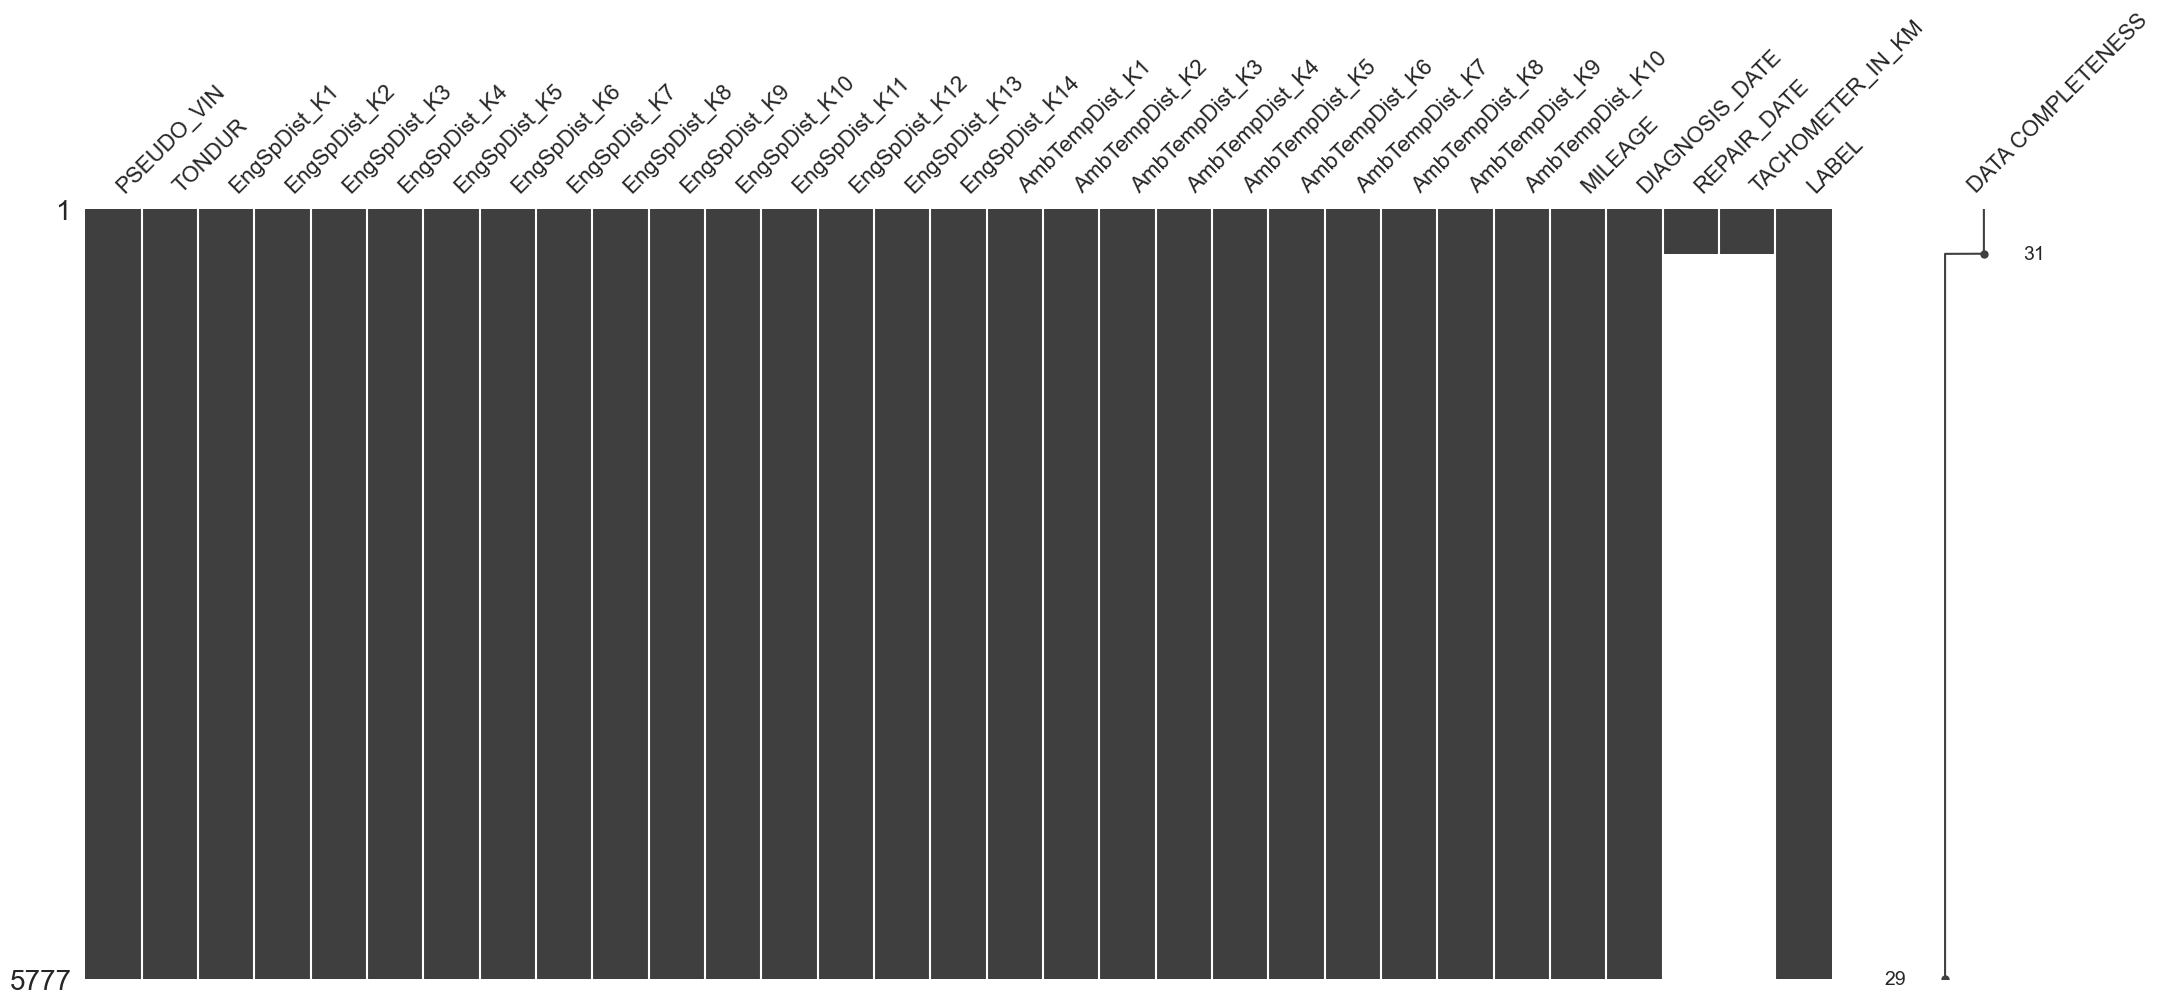

In [132]:
msno.matrix(df, labels=True, sort="descending");

Let's quantify the missing data information in terms of percentage for each feature. Surely, more than 80% of the data is missing for two features.

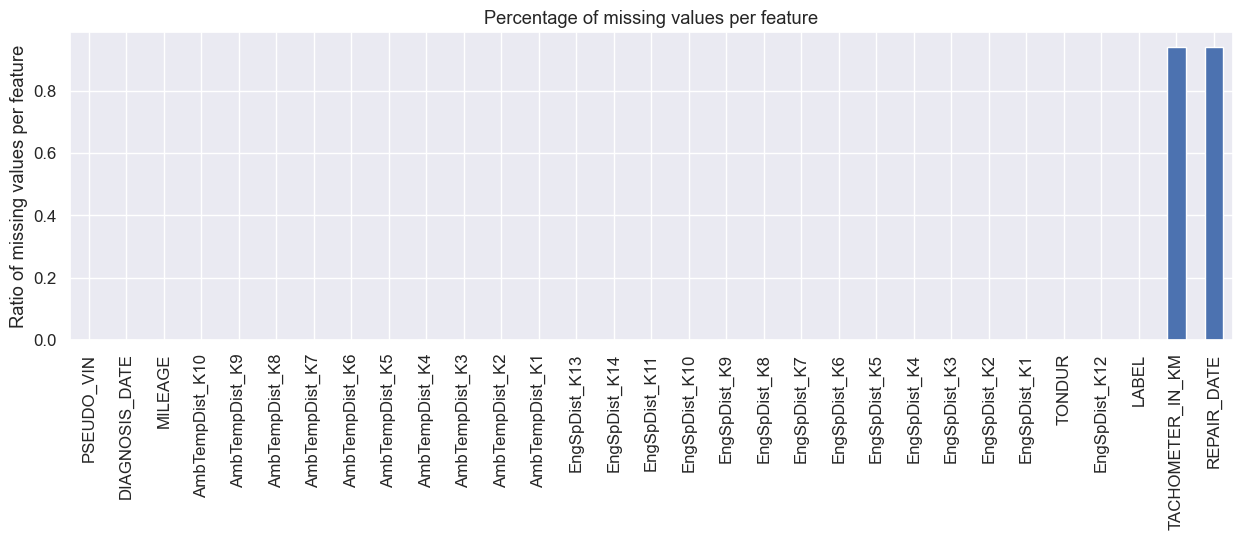

In [133]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

Given the problem we can drop these two variables for two reason: **i)** it contains too much missing data so it doesn't bring information into the modeling. Even though we can apply replacement methodologies but with this amount of missing data, I'd rather remove those features as replacement methods, e.g., averages, etc, would still result in low variance. **ii)** According to my understanding of these two features ***REPAIR_DATE*** is the day when vehicle was repaired, this feature would highly useful if we had actual values for this as we can calculate the number of days through ***DIAGNOSIS_DATE*** and ***REPAIR_DATE*** features which might result in high correlation to the target variable. Same goes for the feature ***TACHOMETER_IN_KM***, this features might have high correlation if it would have been recorded. Moreover, with this amount of data missing, I would missing, these were not considered relevant, consequently, not recorded at all. Remove these features along with ***PSEUDO_VIN***, which is unique identifier.

In [134]:
df_complete_data = df.drop(['REPAIR_DATE', 'TACHOMETER_IN_KM', 'DIAGNOSIS_DATE', 'PSEUDO_VIN'], axis=1)

In [135]:
df_complete_data.shape

(5777, 27)

### Data Variance
Plot unique values per feature to overview the variance of features. We can see that ***TONDUR*** along with other features have alot of unique values which means high variance, whereas, ***EngSpDist_K14*** and other features from left have low number of unique values.

<AxesSubplot: title={'center': 'Unique values per feature'}>

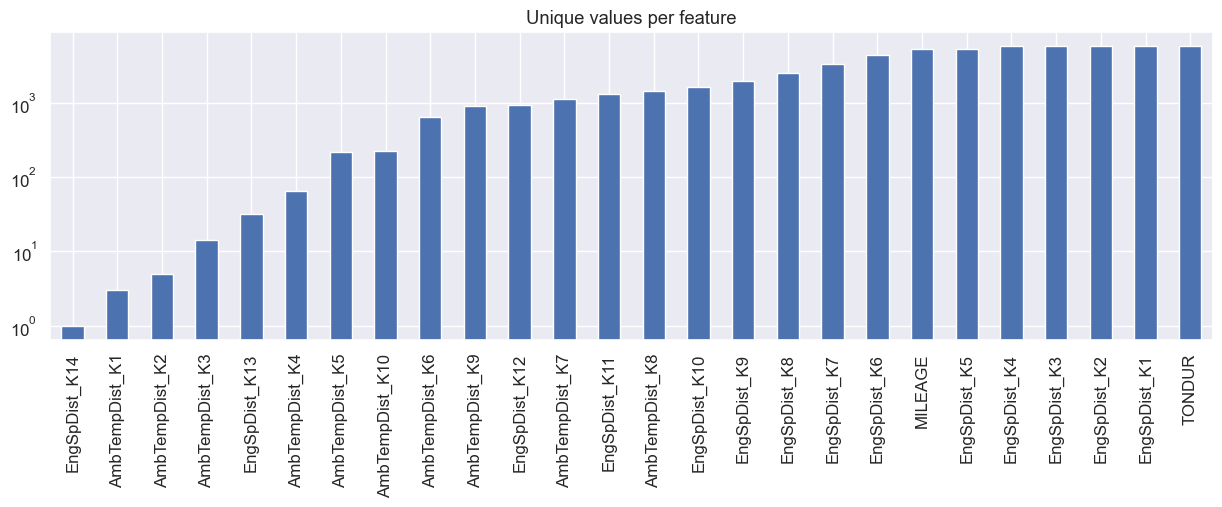

In [136]:
unique_values = df_complete_data.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

The variance of each feature shows that ***EngSpDist_K14*** have the least variance along with other few features, it is supported by our previous analysis. We can keep high variance features at the moment because these features might bring information when correlated with other features. We will look into scatter plots for this analysis. For now we decide to make a ***cut off*** at ***AmbTempDist_K14*** from left of the following graph and drop these features.

<AxesSubplot: title={'center': 'Variance per feature'}>

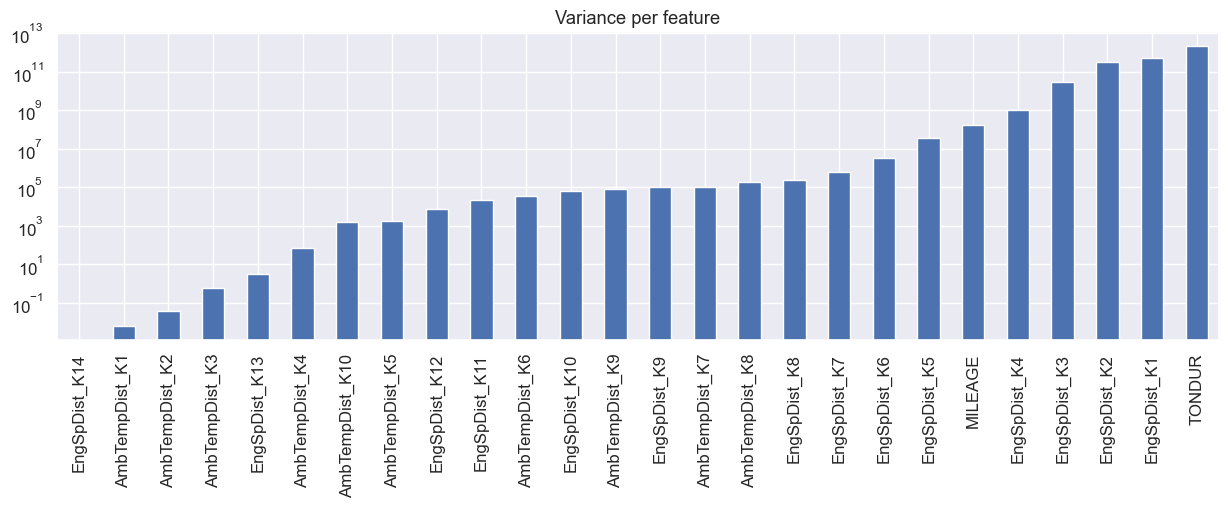

In [137]:
df_complete_data.var().sort_values().plot.bar(logy=True, figsize=(15, 4), title="Variance per feature")

In [138]:
df_low_var_features_dropped = df_complete_data.drop(columns=['EngSpDist_K14', 'AmbTempDist_K1', 'AmbTempDist_K2', 'AmbTempDist_K3', 'EngSpDist_K13', 'AmbTempDist_K4'])

### Duplicate records

There are no duplicate records in the remaining dataset.

In [139]:
n_duplicates = df_low_var_features_dropped.duplicated().sum()
print(f"Duplicate recordrs: {n_duplicates}")

Duplicate recordrs: 0


### Recording Errors

Let's look for recording errors in the dataset. The following plot shows the data point for each values, where x-axis is the index and y-axis the feature values. We can see there are number of outliers for almost every feature, however, the overall graph shows that the values are in specific ranges, so no recroding errors are presented according to my understanding.

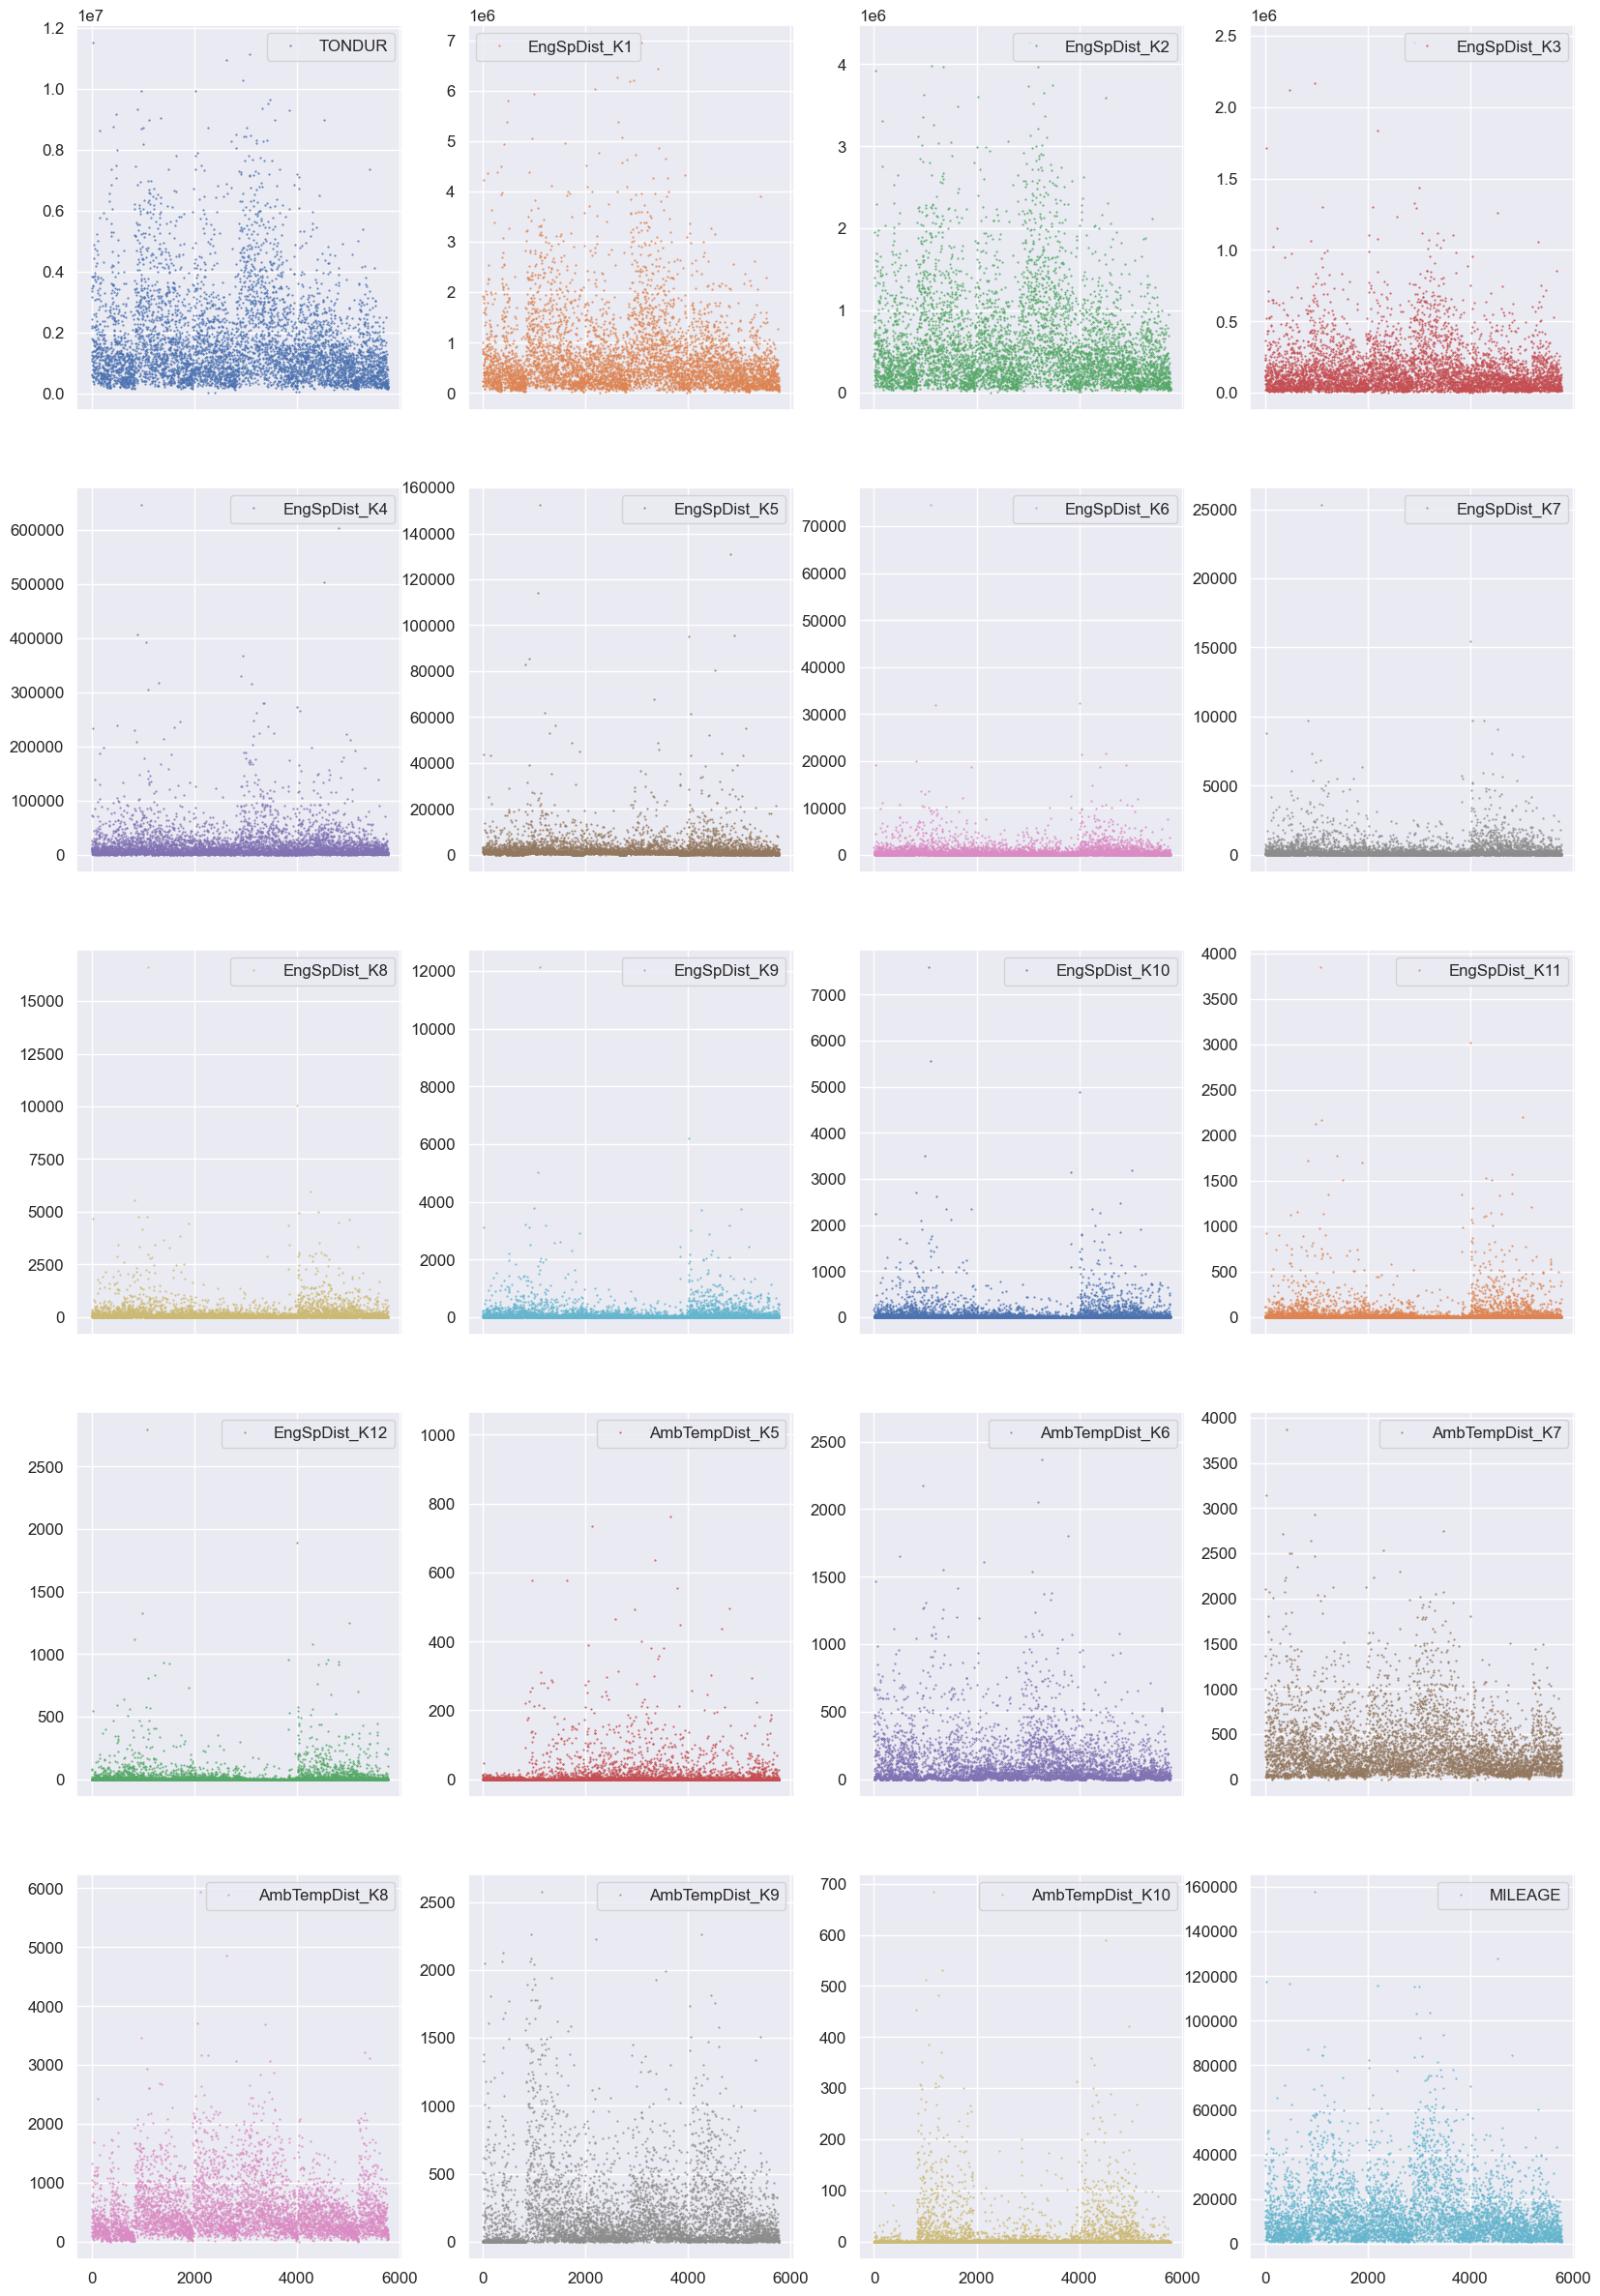

In [140]:
df_low_var_features_dropped.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(20, 30), markersize=1);

### Data Distribution
The following histogram shows that all the features are extremely positively skewed. We will need transformation techniuqes to handle the skewed distribution.

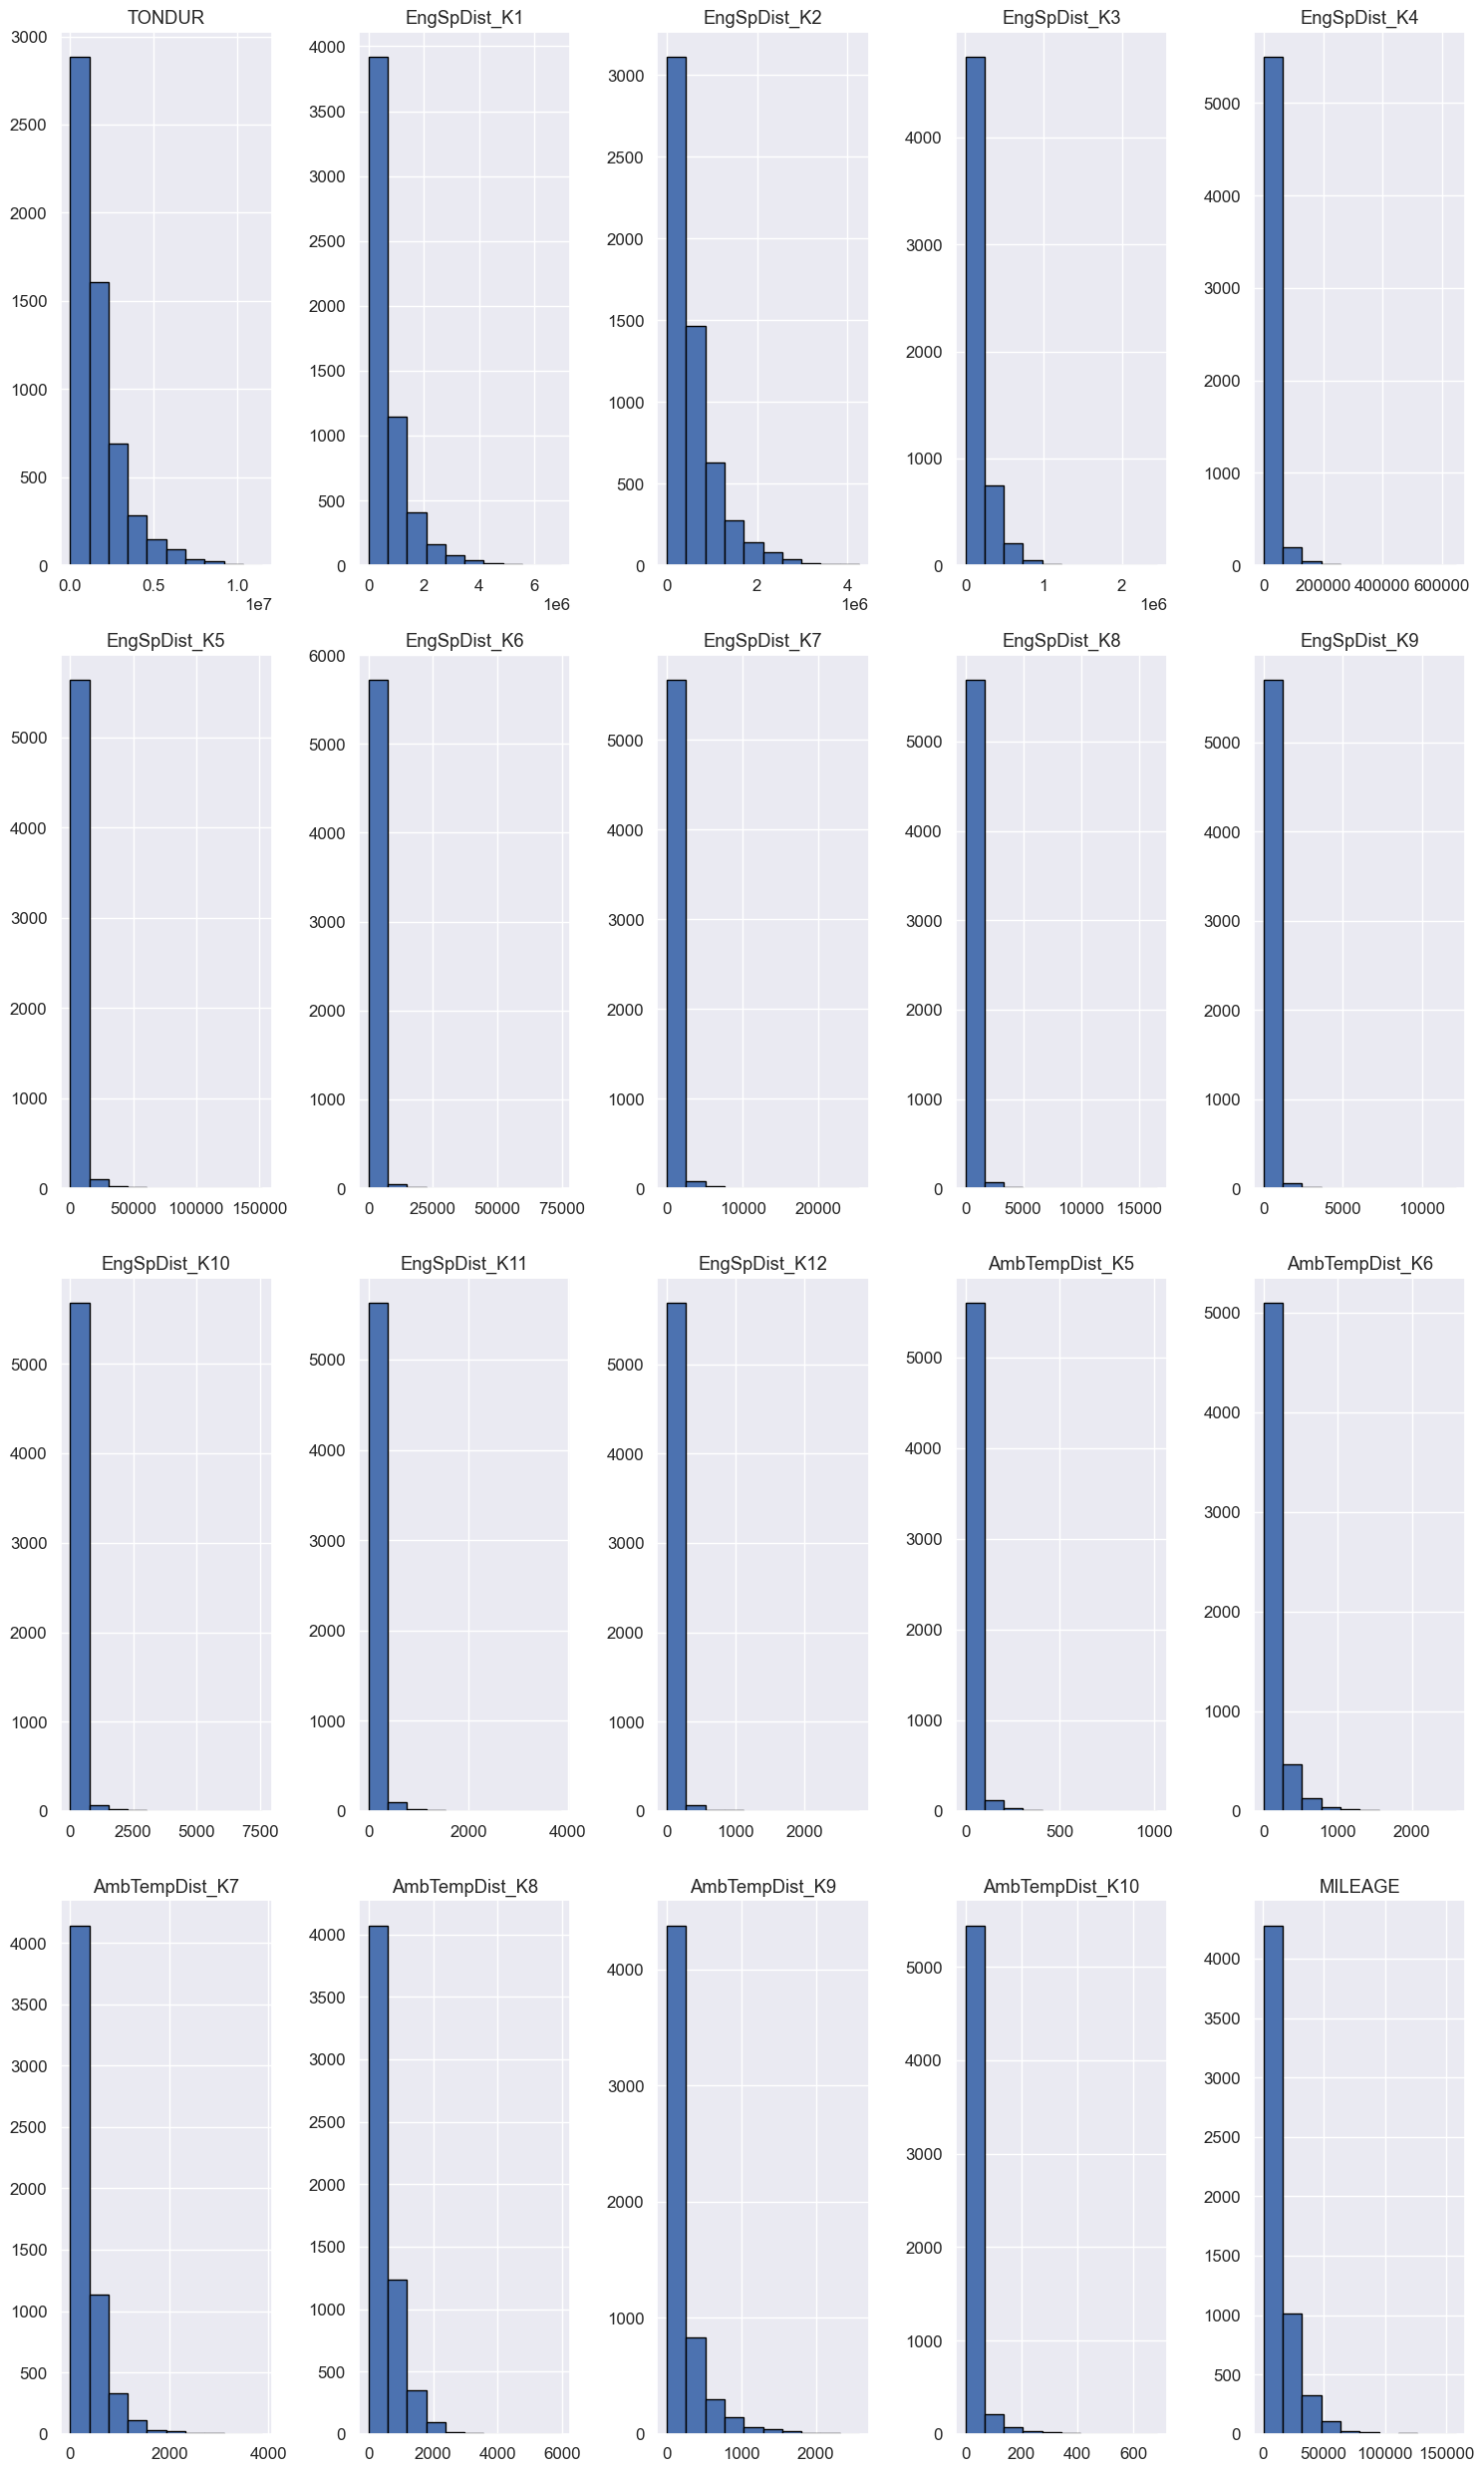

In [142]:
df_low_var_features_dropped.hist(bins=10, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

### Scatter Pair-Plots


In [146]:
features = list(df_low_var_features_dropped.keys())
features.remove("LABEL")

In [148]:
df_low_var_features_dropped.shape

(5777, 21)

The following graphs show the scatter plot of the variables based on the target variable. Overall it looks most of the features have the tendency to support modeling through linear seperability. Moreover, there are high correlation with among variables, for instance, ***TONDOUR*** with ***EngSpDist_K1*** and ***EngSpDist_K2***. We can quantify this through pearson correlation in the later part and potentially remove one of the features among highly correlated features.

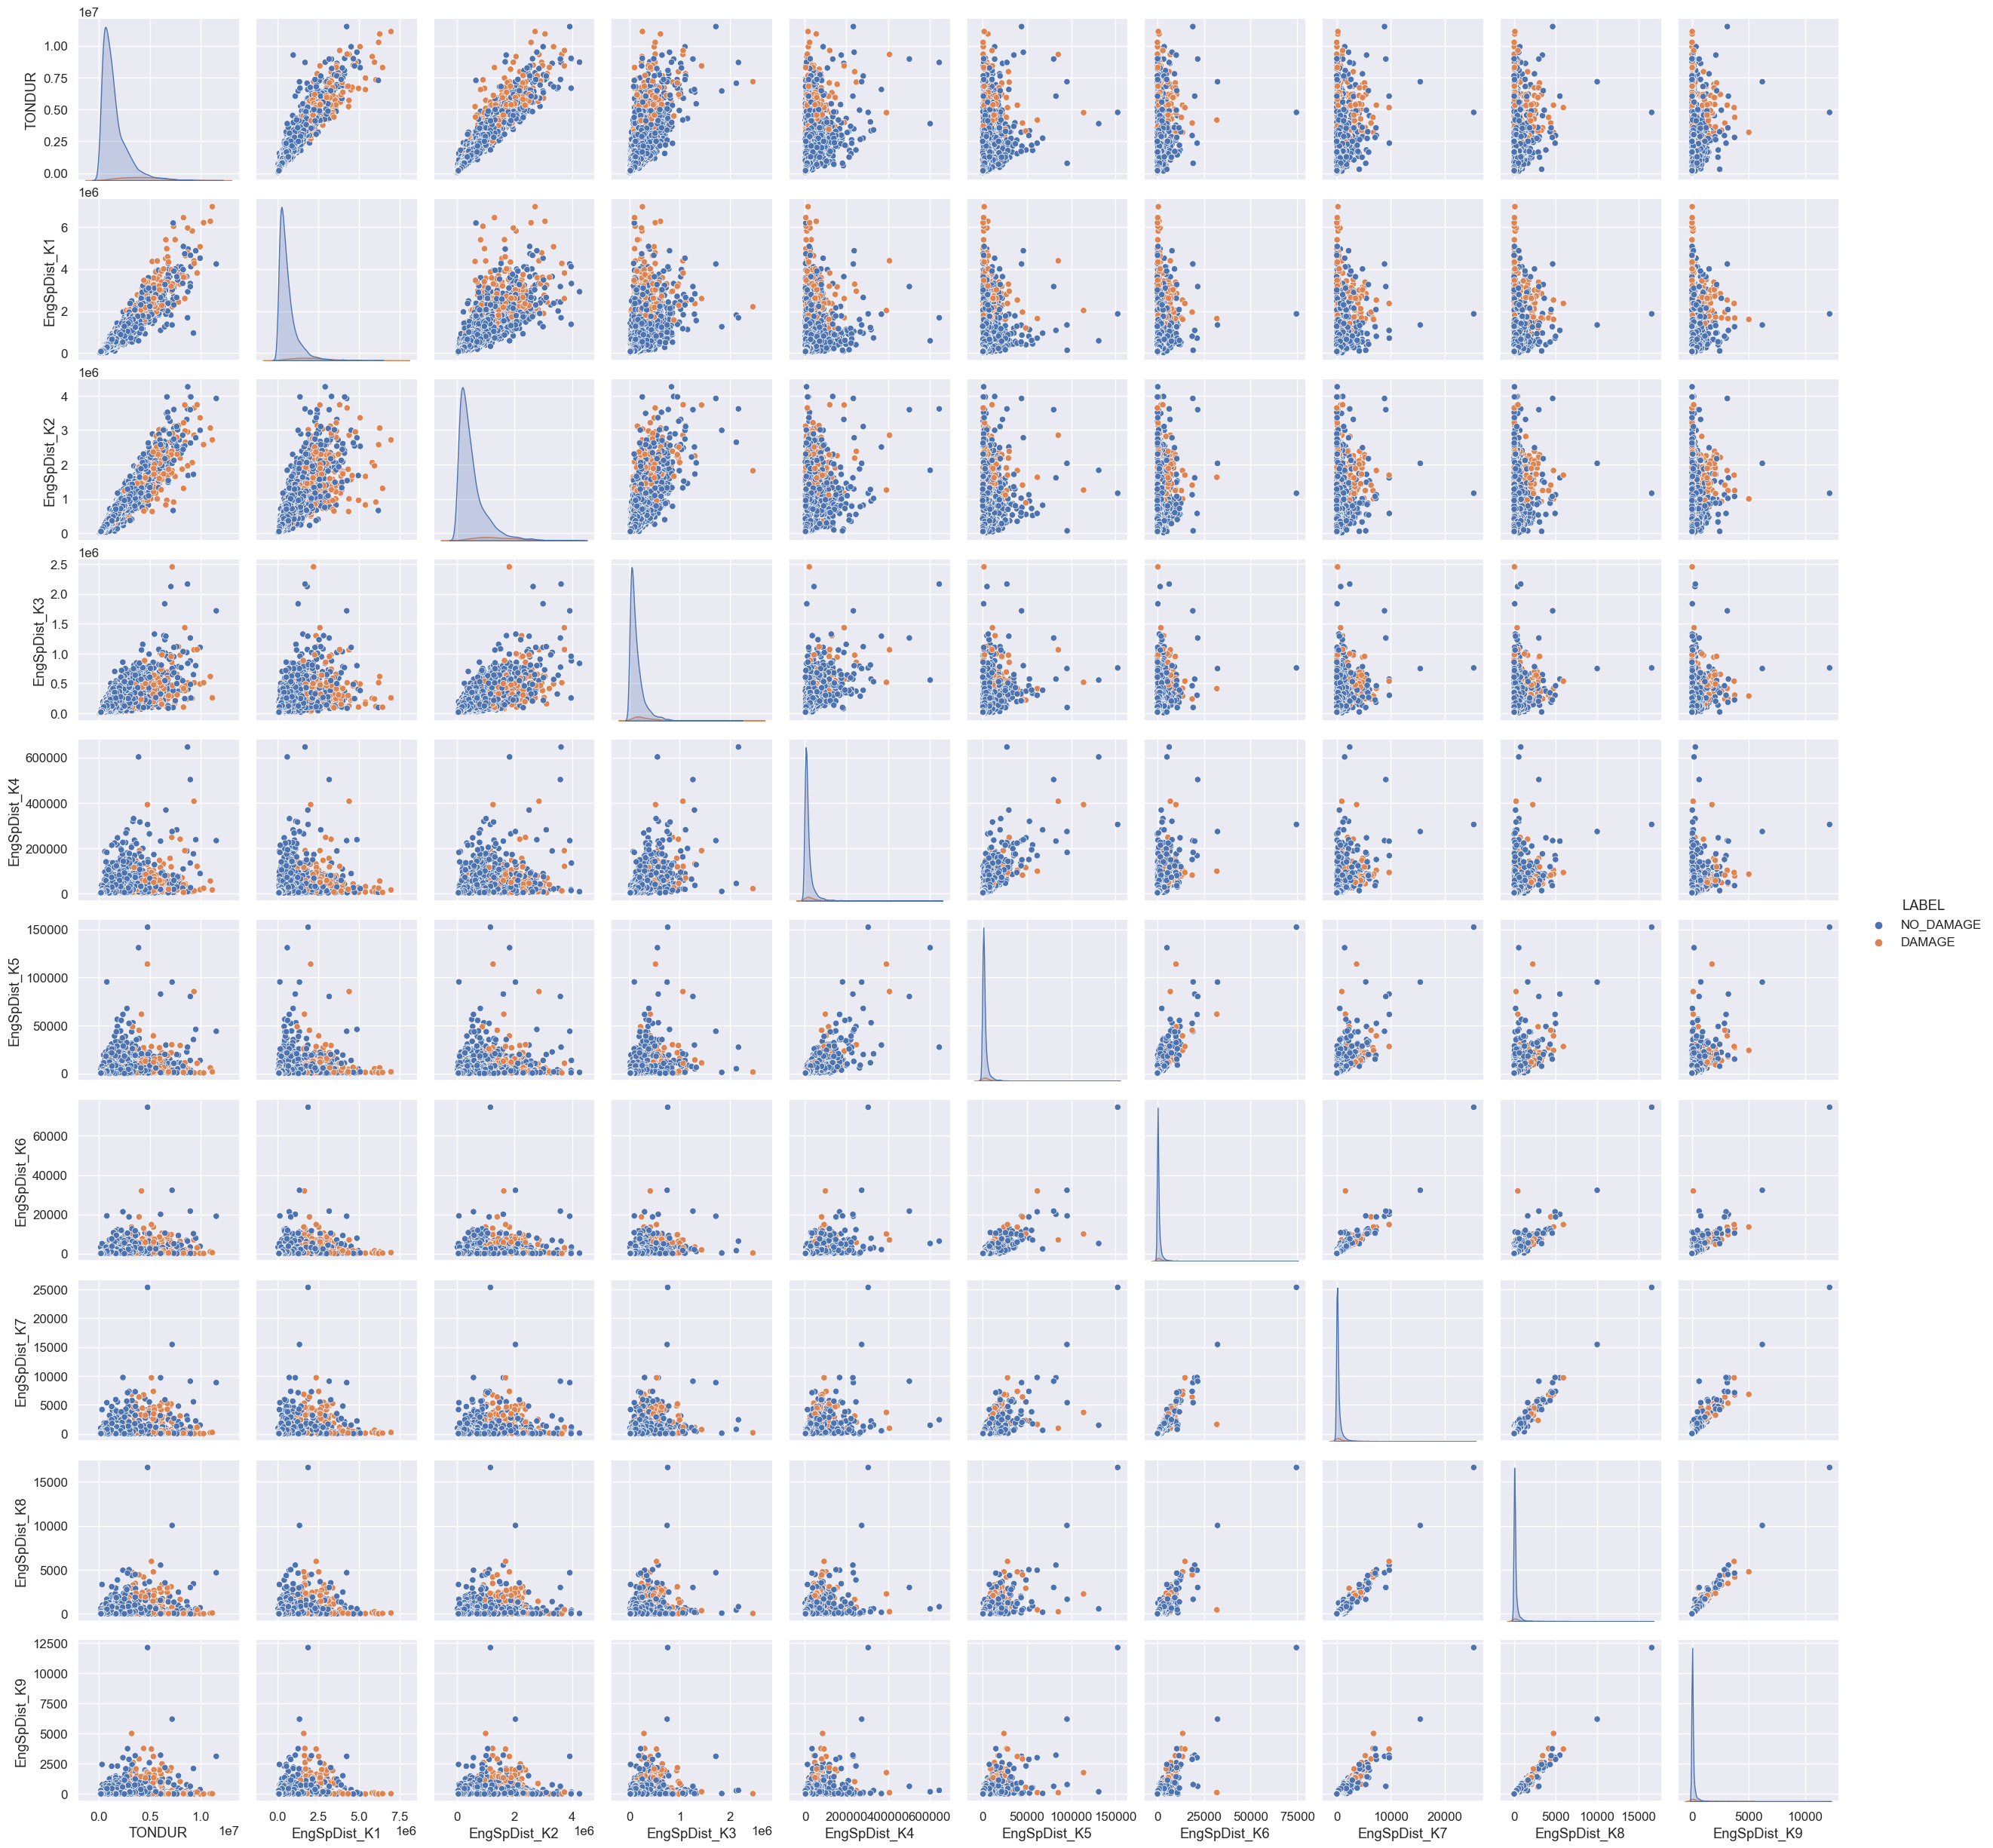

In [147]:
sns.pairplot(df_low_var_features_dropped[features[0:10]+['LABEL']], hue="LABEL", height=2.5)

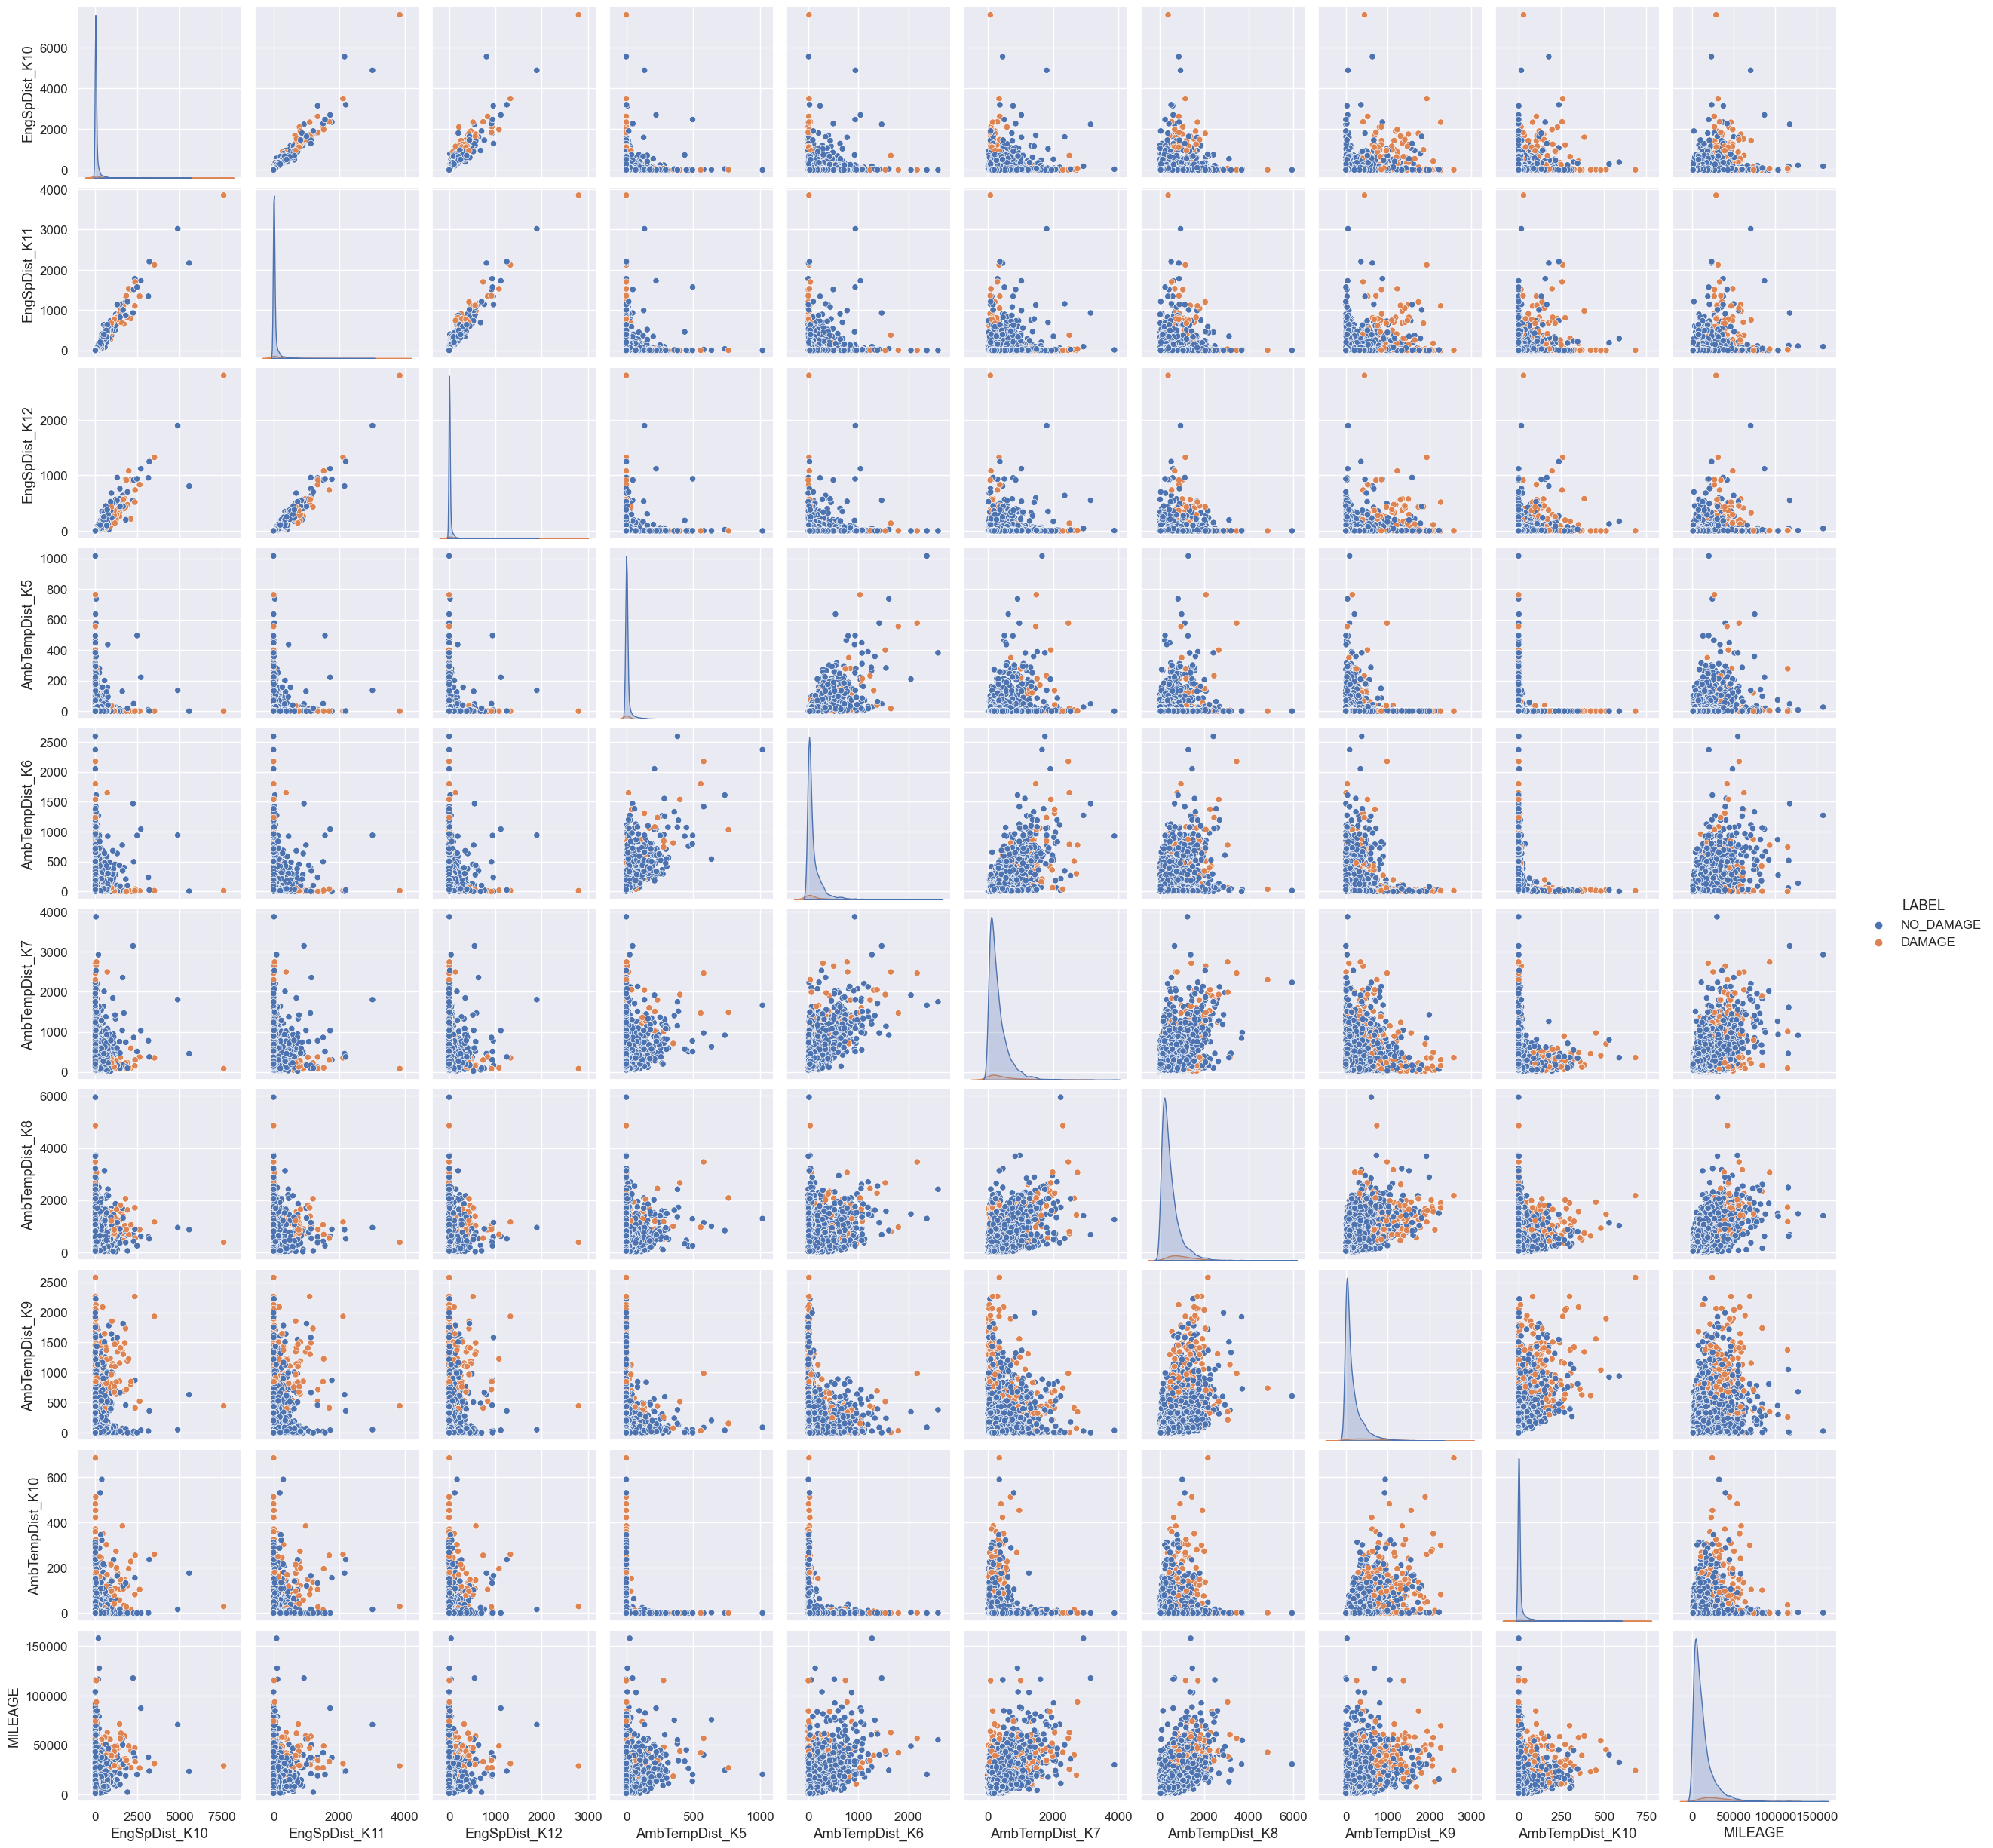

In [149]:
sns.pairplot(df_low_var_features_dropped[features[10:21]+['LABEL']], hue="LABEL", height=2.5)

### Correlation Analsys
The following blocks of cells anlayze the corelation among variables through pearson method.

In [150]:
df_corr = df_low_features_dropped.corr(method="pearson")

The following heatmap shows that are many features that are highly correlated. We can drop few features after the quantification of the correlation analysis. 

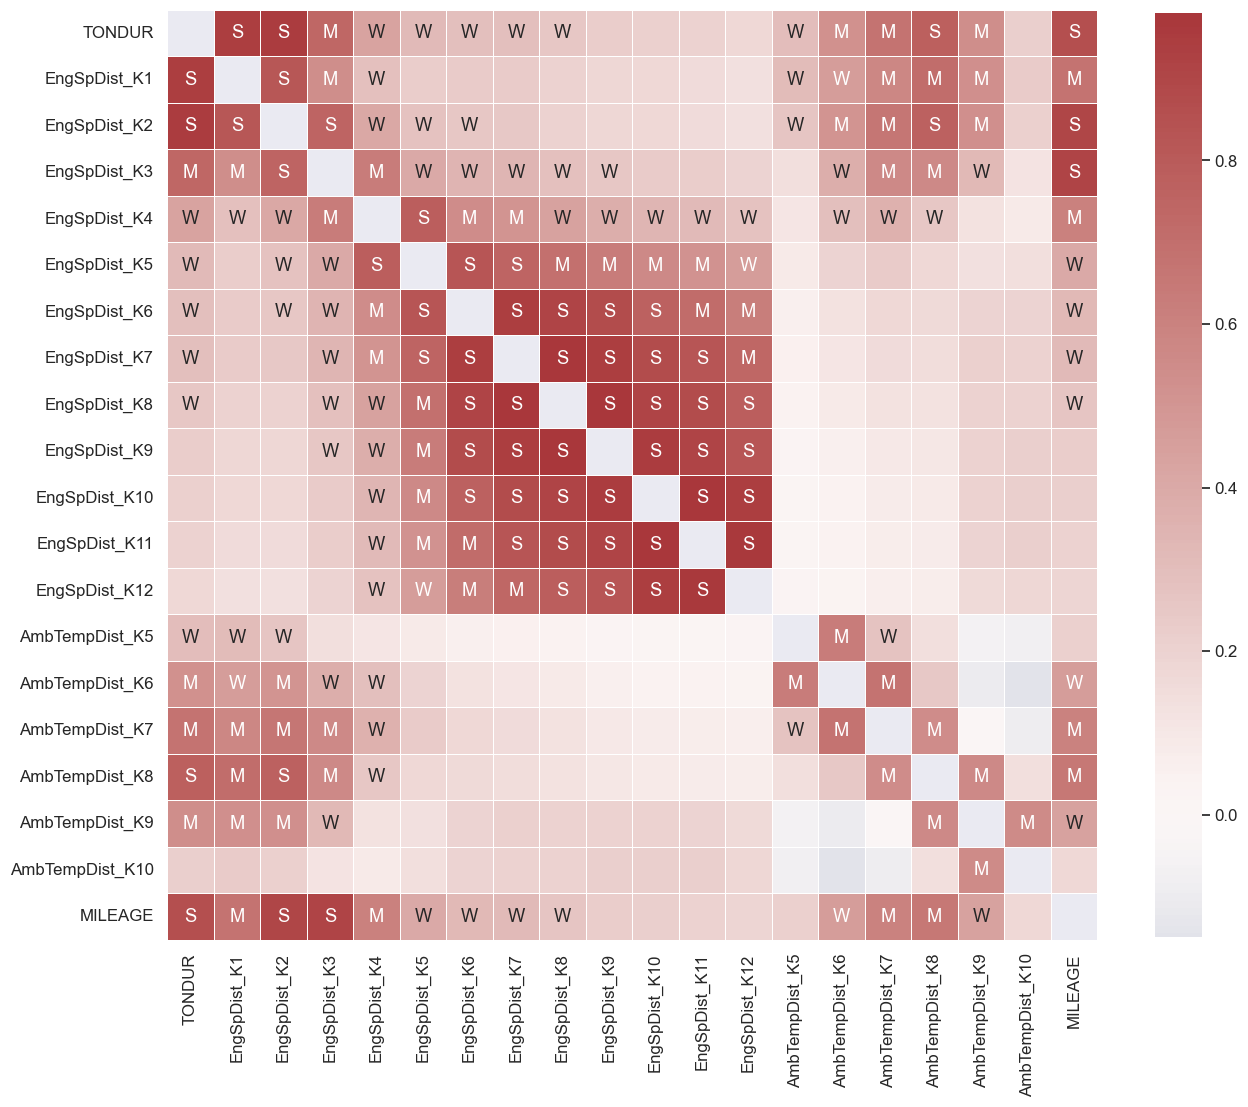

In [151]:
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [152]:
df_corr_abs = df_low_var_features_dropped.corr(method="pearson").abs()
upper_triangle = df_corr_abs.where(np.triu(np.ones(df_corr_abs.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
to_drop

The following features could be dropped based on the threshold, i.e., >95%.

['EngSpDist_K8',
 'EngSpDist_K9',
 'EngSpDist_K10',
 'EngSpDist_K11',
 'EngSpDist_K12']

In [158]:
df_features_dropped_correlation = df_low_var_features_dropped.drop(columns=to_drop, axis=1)

16 features are left including target variable.

In [160]:
df_features_dropped_correlation.shape

(5777, 16)

### Skew Analsys
Previously we noticed that the values are extremely right skewed. It is supported through the following analysis, i.e., for each variable we have positive skew values for all the features. We could transform the features through log transform and see if we are able to transform the data to more or less normal distribution.

In [165]:
old_skew = df_features_dropped_correlation.skew().sort_values(ascending=False)
old_skew

EngSpDist_K6       15.091755
EngSpDist_K5       10.239829
EngSpDist_K7       10.158493
AmbTempDist_K5      8.890287
EngSpDist_K4        6.772806
AmbTempDist_K10     6.094272
AmbTempDist_K6      4.104086
EngSpDist_K3        3.352739
AmbTempDist_K9      2.867396
EngSpDist_K1        2.677670
AmbTempDist_K7      2.596827
MILEAGE             2.536436
AmbTempDist_K8      2.309297
EngSpDist_K2        2.091452
TONDUR              2.062756
dtype: float64

In [166]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

The following graphs for each feature show that log transformation transform the data to normal distribution to some extent. For some variables, e.g., ***EngSpDist_K7***, ***EngSpDist_K6***, and ***EngSpDist_K5*** it does a pretty well job.

TONDUR


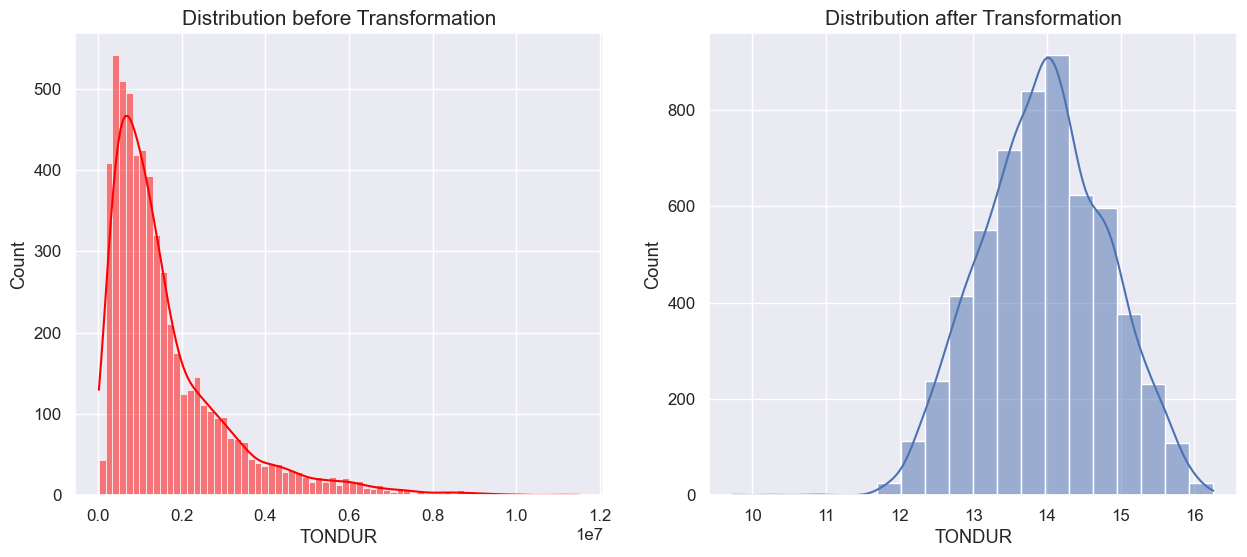

Skewness was 2.06 before & is -0.03 after Log transformation.
EngSpDist_K1


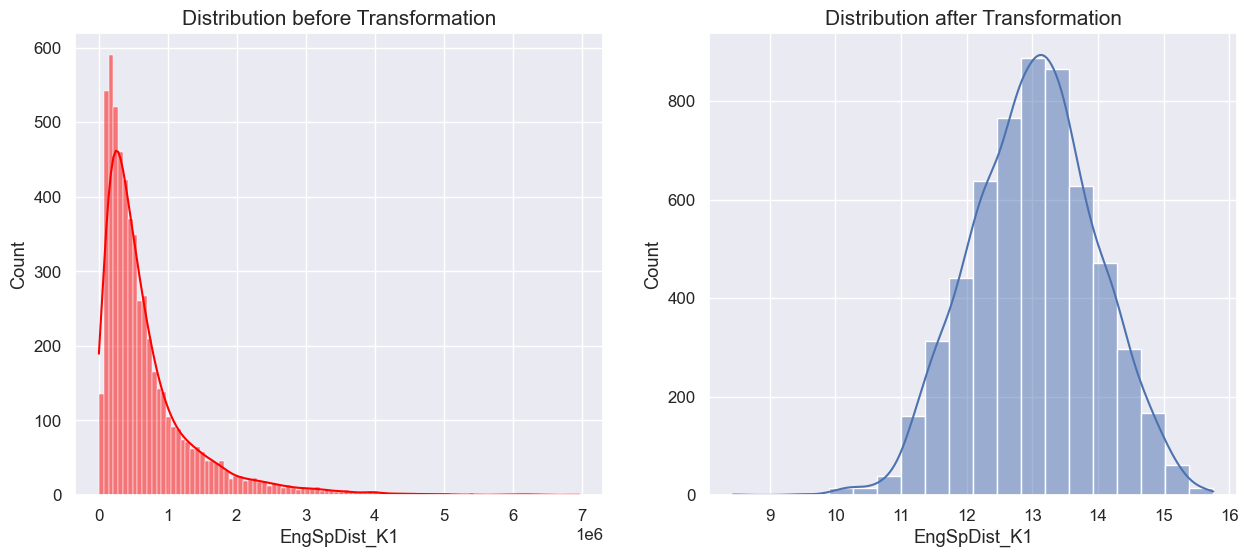

Skewness was 2.68 before & is -0.08 after Log transformation.
EngSpDist_K2


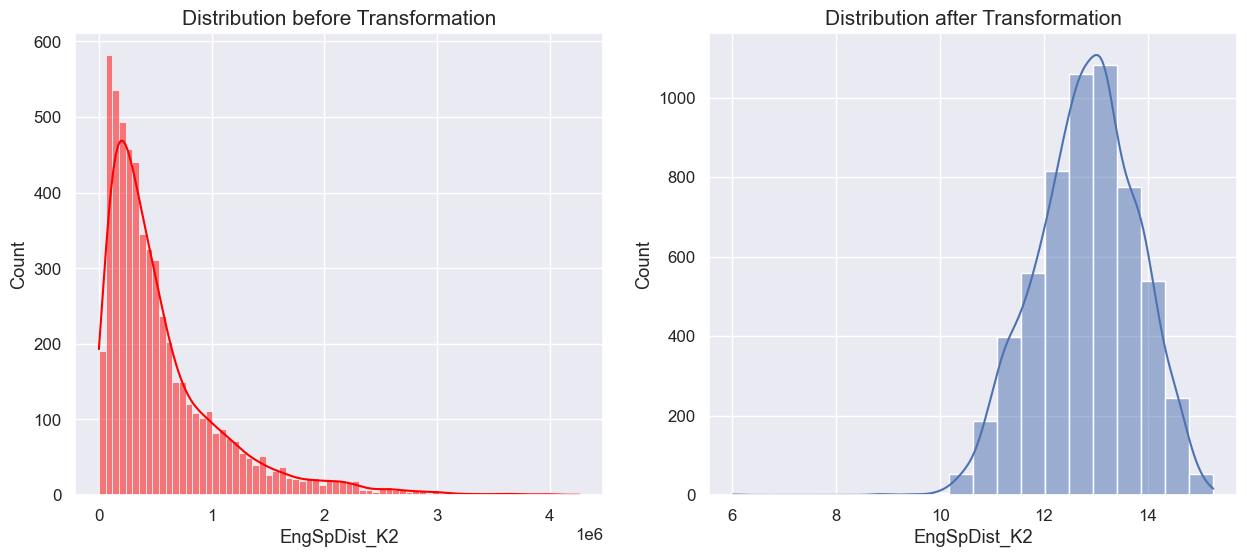

Skewness was 2.09 before & is -0.26 after Log transformation.
EngSpDist_K3


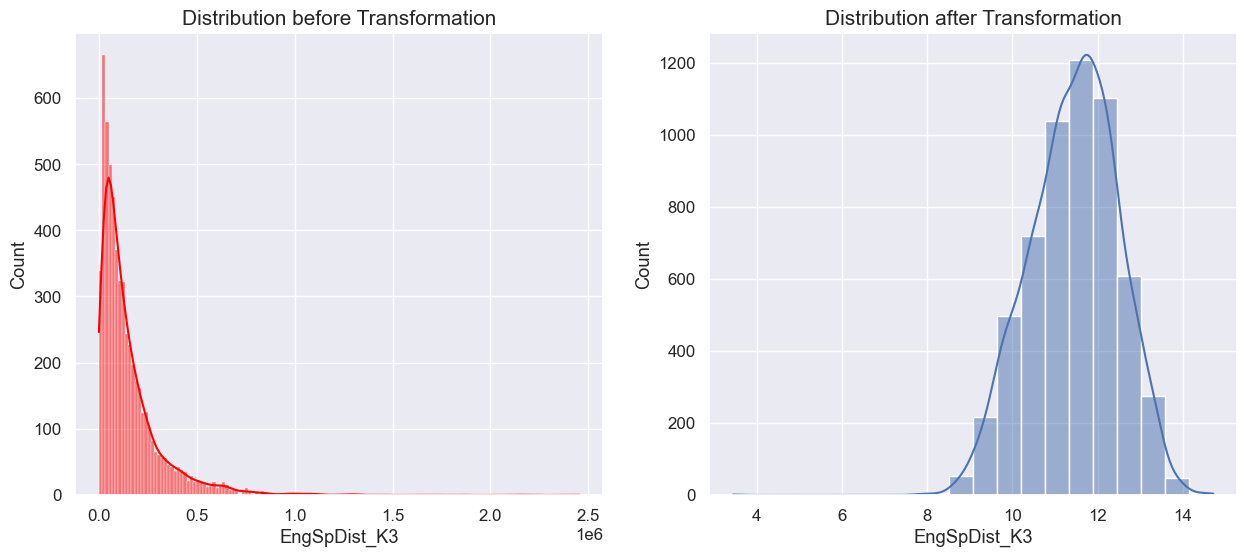

Skewness was 3.35 before & is -0.26 after Log transformation.
EngSpDist_K4


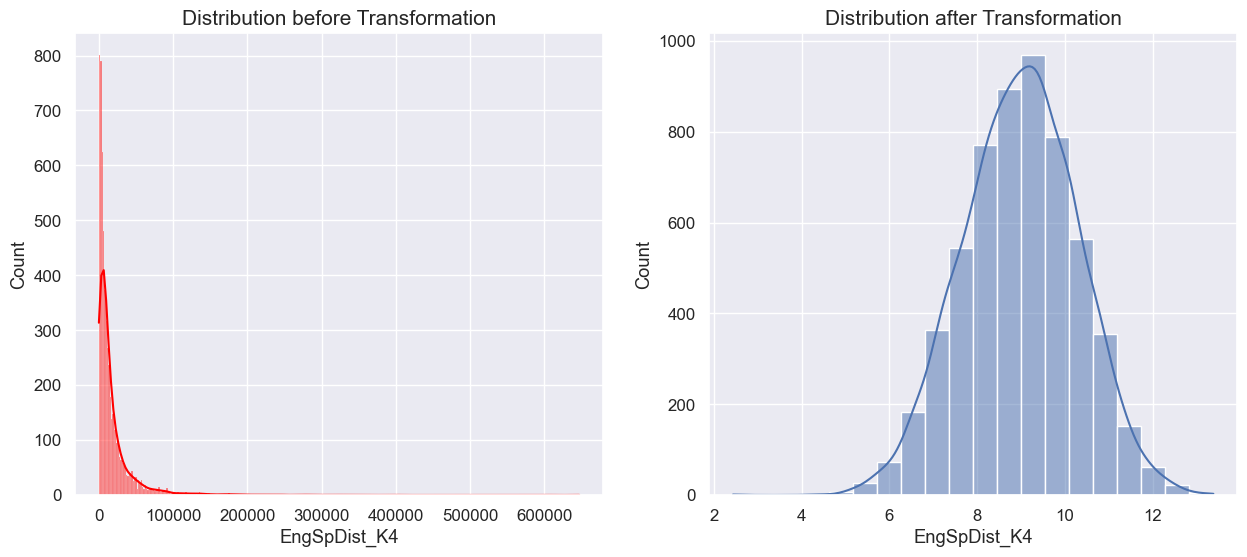

Skewness was 6.77 before & is -0.08 after Log transformation.
EngSpDist_K5


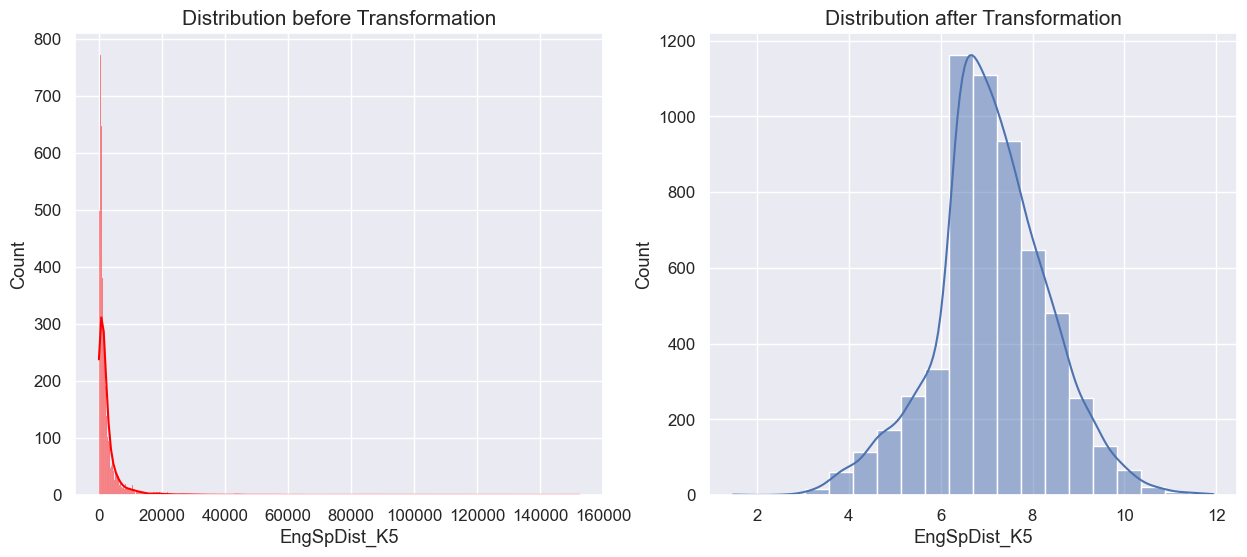

Skewness was 10.24 before & is -0.05 after Log transformation.
EngSpDist_K6


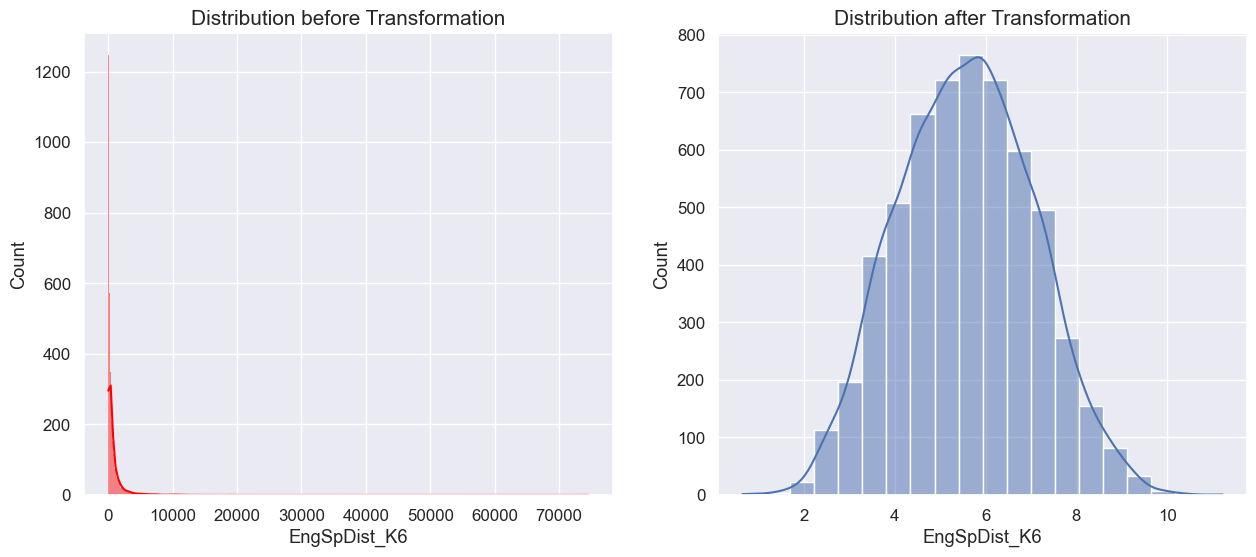

Skewness was 15.09 before & is 0.06 after Log transformation.
EngSpDist_K7


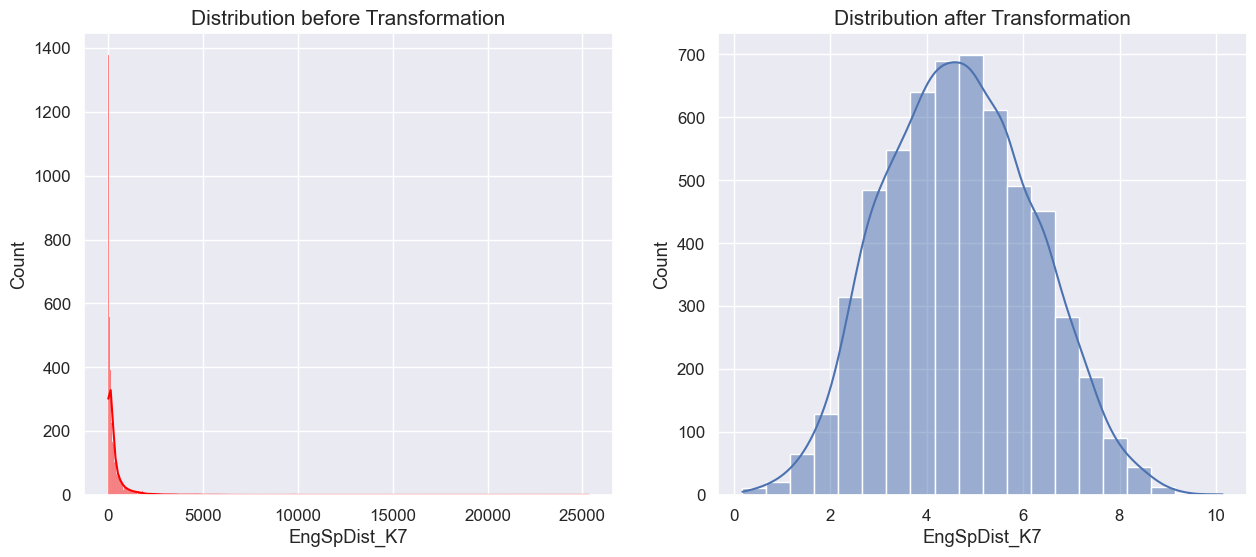

Skewness was 10.16 before & is 0.1 after Log transformation.
AmbTempDist_K5


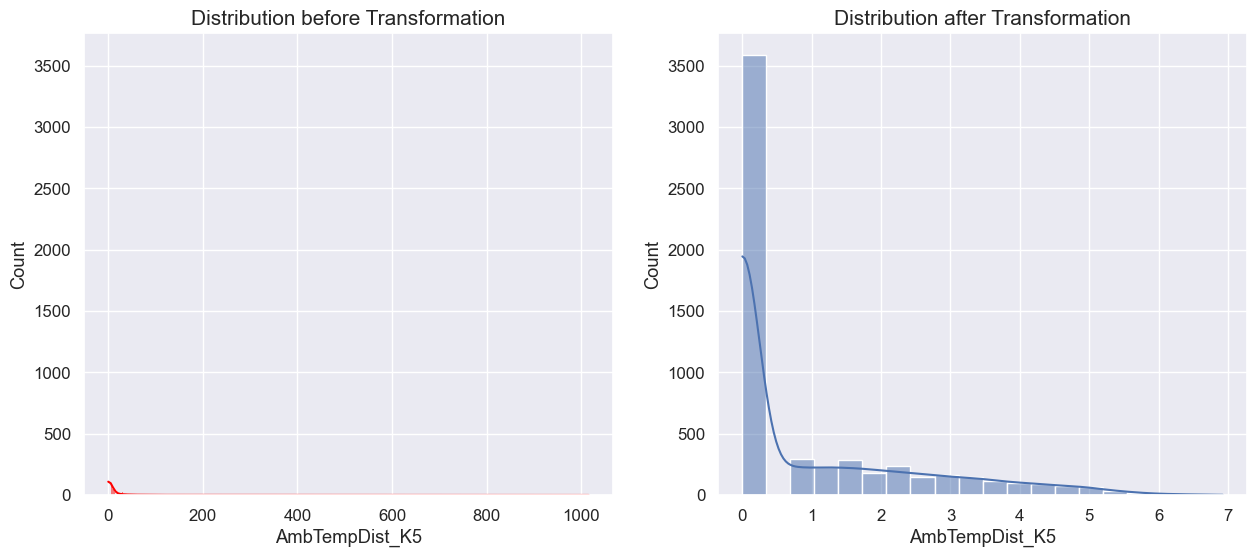

Skewness was 8.89 before & is 1.5 after Log transformation.
AmbTempDist_K6


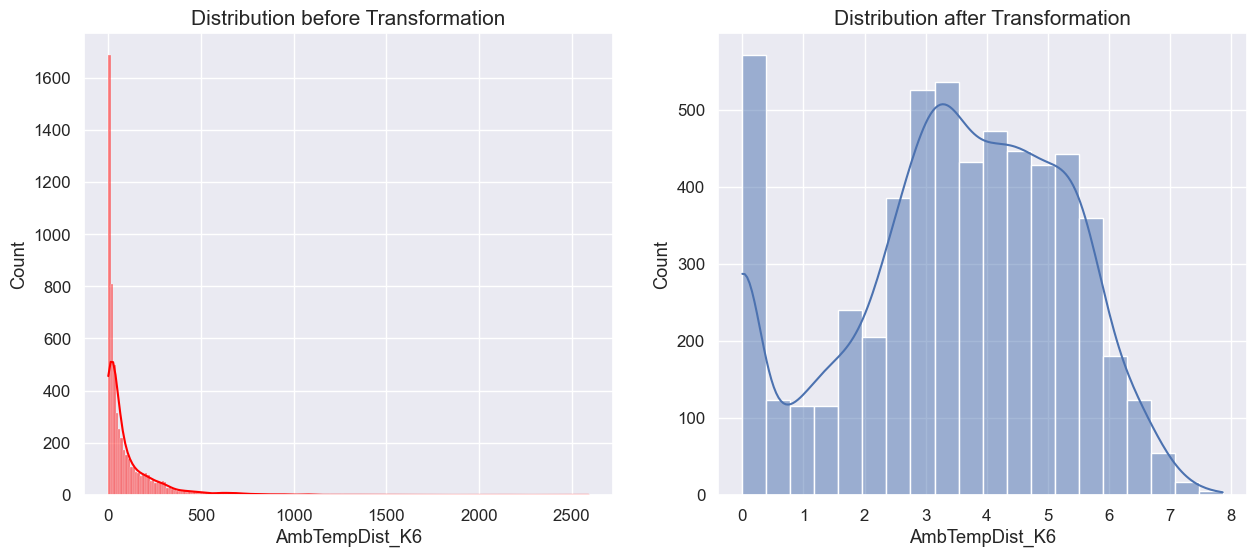

Skewness was 4.1 before & is -0.38 after Log transformation.
AmbTempDist_K7


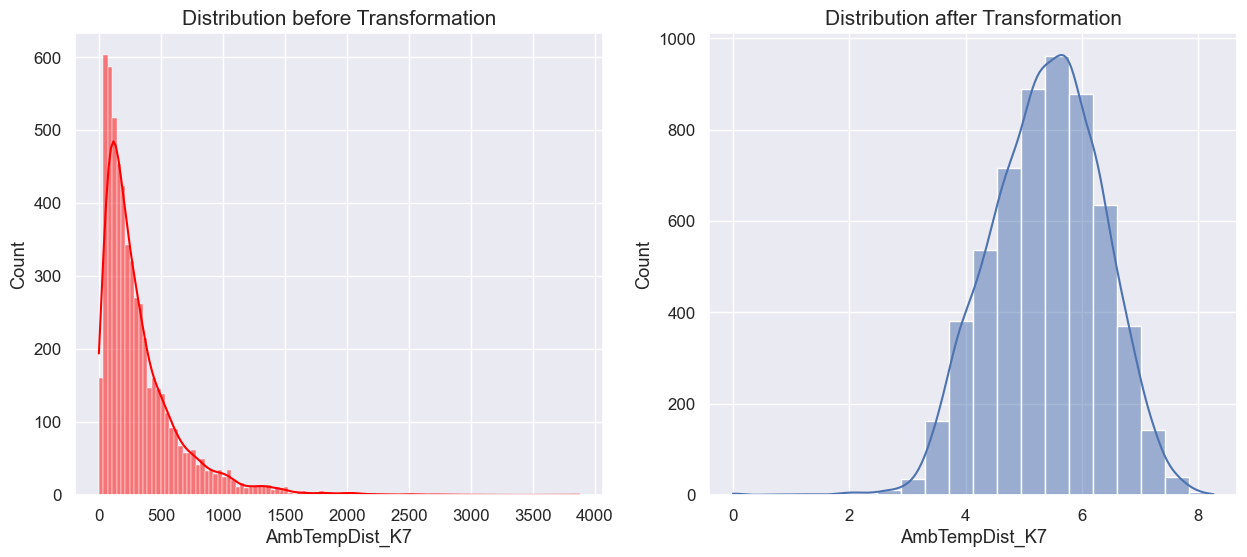

Skewness was 2.6 before & is -0.27 after Log transformation.
AmbTempDist_K8


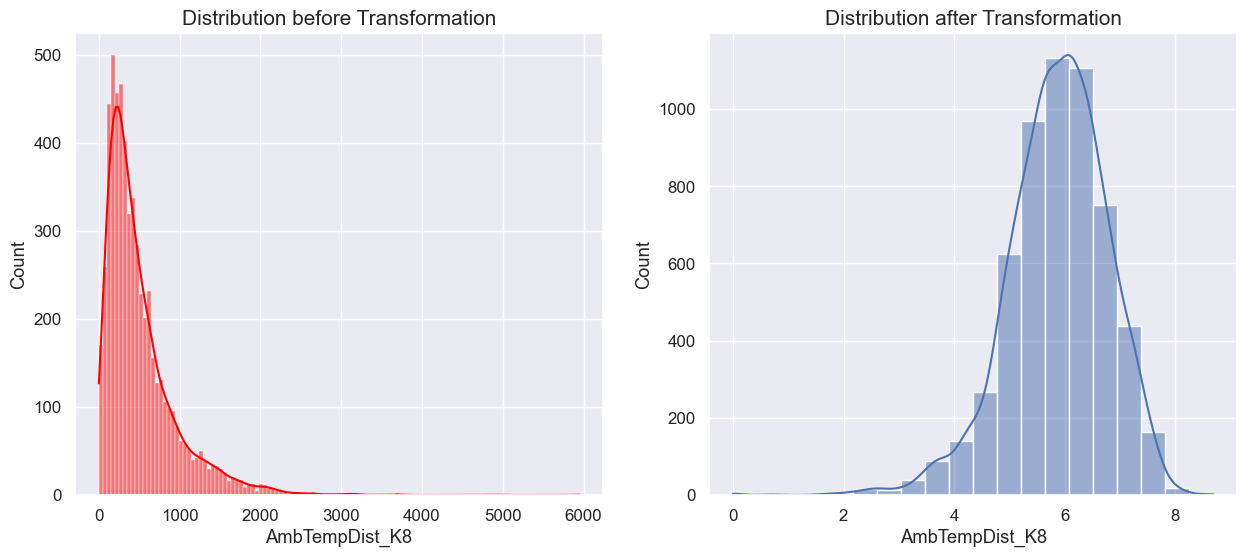

Skewness was 2.31 before & is -0.69 after Log transformation.
AmbTempDist_K9


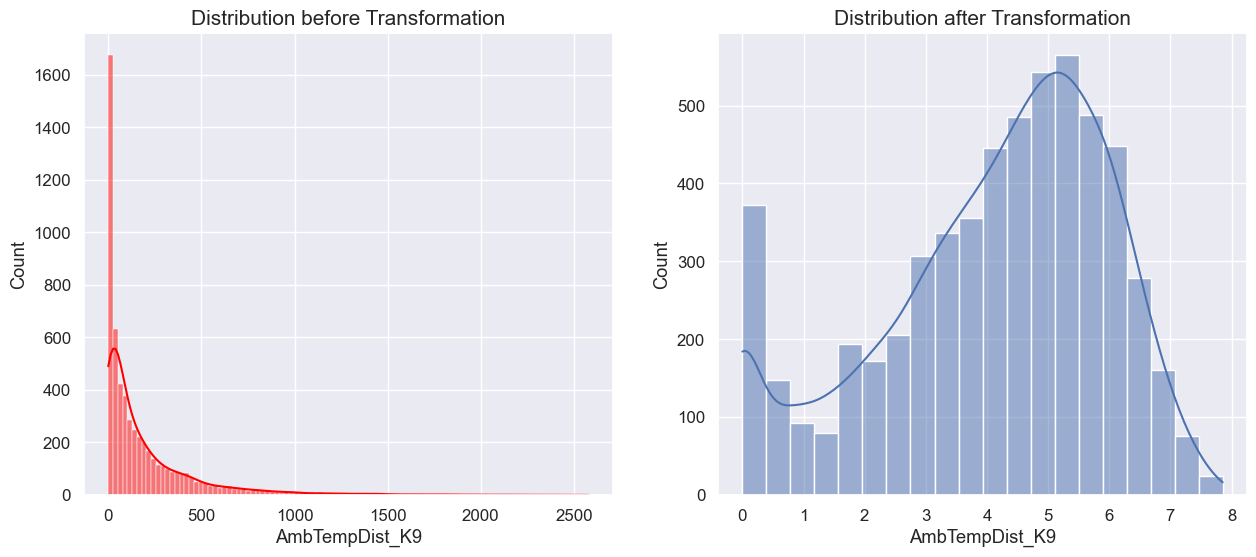

Skewness was 2.87 before & is -0.63 after Log transformation.
AmbTempDist_K10


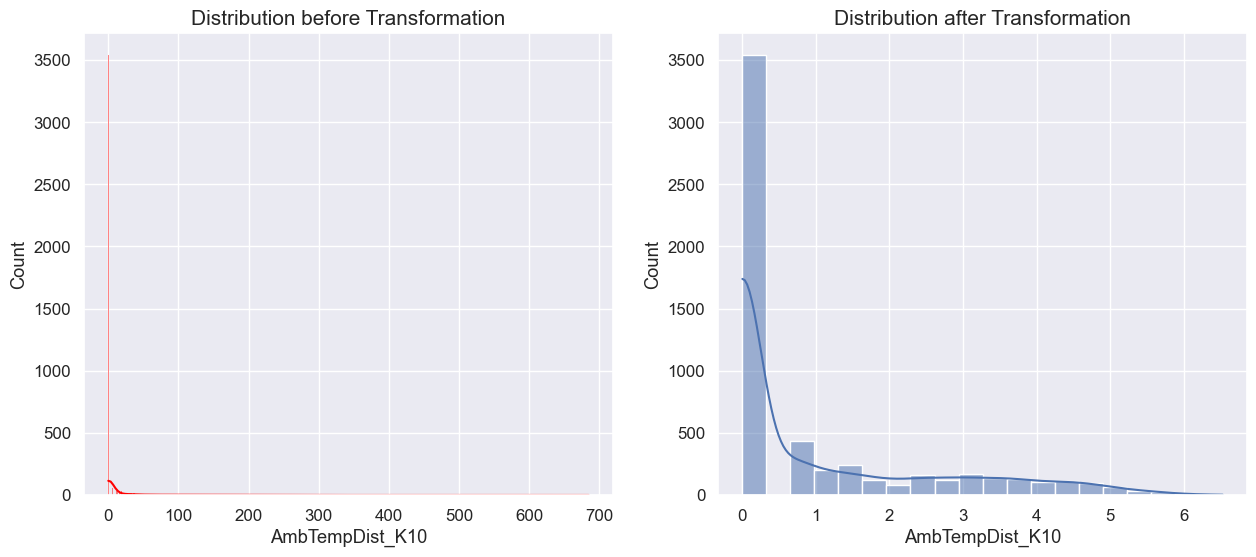

Skewness was 6.09 before & is 1.46 after Log transformation.
MILEAGE


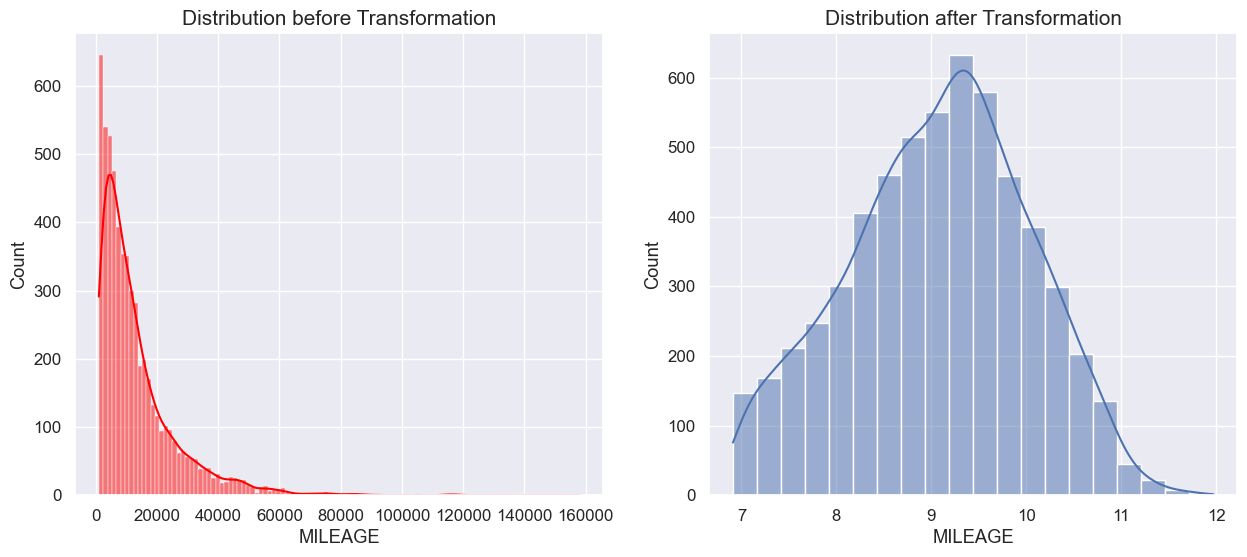

Skewness was 2.54 before & is -0.14 after Log transformation.
LABEL


In [171]:
def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df_features_dropped_correlation[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(df_features_dropped_correlation))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")

for f in df_features_dropped_correlation.keys():
    print(f)
    if f!='LABEL':
        logTrans(feature=f)

In [179]:
features = list(df_features_dropped_correlation.keys())
features.remove('LABEL')
print(features)

['TONDUR', 'EngSpDist_K1', 'EngSpDist_K2', 'EngSpDist_K3', 'EngSpDist_K4', 'EngSpDist_K5', 'EngSpDist_K6', 'EngSpDist_K7', 'AmbTempDist_K5', 'AmbTempDist_K6', 'AmbTempDist_K7', 'AmbTempDist_K8', 'AmbTempDist_K9', 'AmbTempDist_K10', 'MILEAGE']


We can now transform that data. 

In [184]:
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), features)])
df_log = pd.DataFrame(logTr.fit_transform(df_features_dropped_correlation))

In [187]:
df_log.columns = features

In [189]:
df_log['LABEL'] = df_features_dropped_correlation['LABEL']

In [191]:
df_log.shape

(5777, 16)

In [206]:
df_log['LABEL'] = df_log['LABEL'].map({'DAMAGE': 1, 'NO_DAMAGE': 0})

### Feature Importance
In the following block we will look at top features through ***Random Forest*** that could be important for the modeling. For simplicity, I am only relying on RF at the moment but there are other techniques, e.g., SHAP, Permutation based method, etc.

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [208]:
X = df_log[features].values
y = df_log['LABEL'].values

Well, that's **surprising**, only two features ***EngSpDist_K1*** and ***AmbTempDist_K9***, i.e., cut off, seem to be highly important. We can only consider these two for modeling and compare with the results with the all features, i.e., features selected after analysis, e.g., variance, correlation, missing data.

[0.03992337 0.31104937 0.04464473 0.04004993 0.05230931 0.03933973
 0.03582132 0.04852793 0.01698279 0.05753787 0.05608798 0.04909193
 0.12120265 0.04515054 0.04228056]


Text(0.5, 0, 'Random Forest Feature Importance')

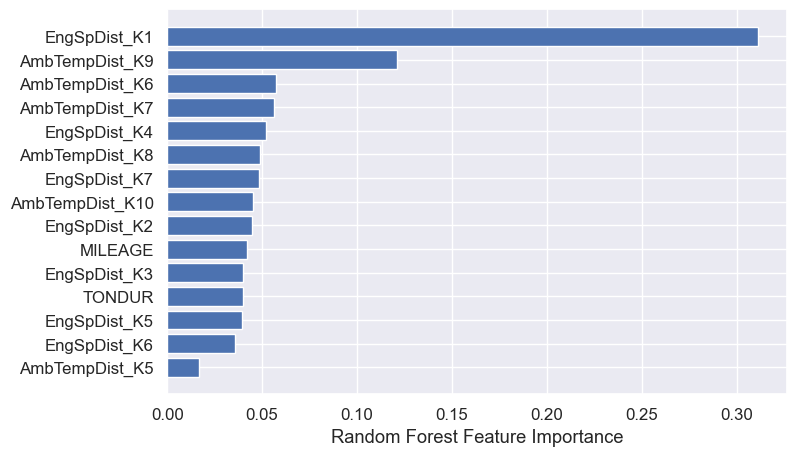

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
print(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(list(map(features.__getitem__, sorted_idx)), rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Let's confirm this with another method, i.e., permuation importance, and it looks we also got the same feature considered important through permuation method. As permutation method takes a trained model as an argument for testing data, it looks reasonable to consider these features important as our data is **highly imbalanced**. However, I will still include selected features after analysis and important features to compare the results and finalize the model.

Text(0.5, 0, 'Permutation Importance')

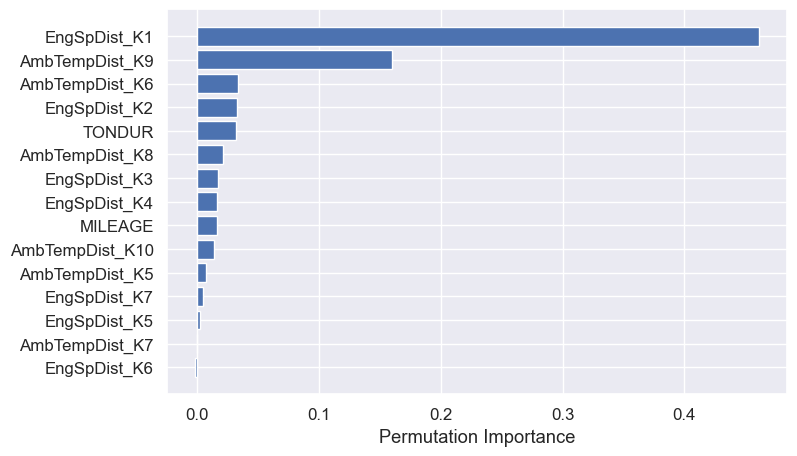

In [230]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(list(map(features.__getitem__, sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [233]:
df_log.to_csv('./data/logged_transformed_data.csv')